# Forecasting GDP Per Capita in US

---

### Project Overview
This project aims to forecast GDP per capita in the US over the next year. Accurately predicting GDP per capita is crucial for strategic product planning. Understanding whether a product is classified as a normal or inferior good allows firms to anticipate how changes in GDP per capita levels will impact consumer behavior and, consequently, their sales. By forecasting GDP per capita, businesses can better align their strategies to capitalize on expected shifts in purchasing power.

### Background
The dataset utilized in this project comprises US macroeconomic data spanning from 2002 to 2022. This comprehensive dataset includes key economic indicators such as GDP, inflation rates, and unemployment rates, which are essential for understanding the factors that influence GDP per capita. By analyzing these variables, the project aims to uncover trends and correlations that can inform accurate forecasts of future GDP per capita levels.

### Objectives
- **Segment Economic Cycles:** Identify and categorize distinct periods within the economic cycle to understand their impact on GDP per capita trends.
- **Analyze Influential Factors:** Determine the key macroeconomic factors that significantly influence GDP per capita.
- **Forecast Future Income:** Predict the GDP per capita for the upcoming year using the identified factors and economic indicators.

### Data Description
#### Dataset Overview
The dataset for this project is sourced from FRED, CENSUS, OECD, and the Conference Board. It covers a period of 241 months, from 2002 to 2022, and includes 15 features.
#### Key Features
- **DATE:** Start date of the month
- **UNRATE (%):** Unemployment rate in the US for the specified month
- **CONSUMER CONF INDEX:** Consumer Confidence Index provided by the Conference Board
- **PPI-CONST MAT.:** Producer Price Index for Construction Materials
- **CPIALLITEMS:** Consumer Price Index for All Items in the US
- **INFLATION (%):** Inflation rate in the US
- **MORTGAGE INT. MONTHLY AVG (%):** Average mortgage interest rate for the month
- **MED HOUSEHOLD INCOME:** Median household income in the US
- **CORP. BOND YIELD (%):** Corporate bond yield
- **MONTHLY HOME SUPPLY:** Monthly housing supply data
- **% SHARE OF WORKING POPULATION:** Percentage of the population aged 18 to 60
- **GDP PER CAPITA:** GDP per capita
- **QUARTERLY REAL GDP:** Real GDP data on a quarterly basis
- **QUARTERLY GDP GROWTH RATE (%):** Quarterly GDP growth rate
- **CSUSHPISA:** S&P/Case-Shiller U.S. National Home Price Index provided by FRED
#### Data Types
- **Categorical:** DATE
- **Numerical:** UNRATE (%), CONSUMER CONF INDEX, PPI-CONST MAT., CPIALLITEMS, INFLATION (%), MORTGAGE INT. MONTHLY AVG (%), MED HOUSEHOLD INCOME, CORP. BOND YIELD (%), MONTHLY HOME SUPPLY, % SHARE OF WORKING POPULATION, GDP PER CAPITA, QUARTERLY REAL GDP, QUARTERLY GDP GROWTH RATE (%), CSUSHPISA

### Prediction
The primary goal of this project is to forecast GDP per capita for the upcoming year. By leveraging historical data and macroeconomic indicators, the aim is to develop an accurate prediction model that can provide valuable insights for economic planning and analysis.

### Metric
**RMSE (Root Mean Squared Error):** RMSE measures the square root of the average of the squared differences between predicted and actual values. It provides an easily interpretable measure of prediction accuracy, expressed in the same units as the target variable. Lower RMSE values indicate better model performance and closer alignment between predicted and actual values.

### References
1. **Dataset Source:** [FRED](https://fred.stlouisfed.org/), [CENSUS](https://www.census.gov/data.html), [OECD](https://www.oecd.org/statistics/), [Conference Board](https://www.conference-board.org/)

---

## Exploratory Data Analysis

### Understanding the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

DATE  UNRATE(%)  CONSUMER CONF INDEX  PPI-CONST MAT.  CPIALLITEMS  \
0  01-05-2022        3.6                106.4         352.857   123.322800   
1  01-04-2022        3.6                107.3         343.730   121.978170   
2  01-03-2022        3.6                107.2         345.852   121.301004   
3  01-02-2022        3.8                110.5         343.583   119.702806   
4  01-01-2022        4.0                113.8         345.742   118.619339   

   INFLATION(%)  MORTGAGE INT. MONTHLY AVG(%)  MED HOUSEHOLD INCOME  \
0      8.581511                        5.2300                   NaN   
1      8.258629                        4.9825                   NaN   
2      8.542456                        4.1720                   NaN   
3      7.871064                        3.7625                   NaN   
4      7.479872                        3.4450                   NaN   

   CORP. BOND YIELD(%)  MONTHLY HOME SUPPLY  % SHARE OF WORKING POPULATION  \
0                 4.13                  8.4                            NaN   
1                 3.76                  8.4                            NaN   
2                 3.43                  7.0                            NaN   
3                 3.25                  6.0                            NaN   
4                 2.93                  5.7                            NaN   

   GDP PER CAPITA  QUARTERLY REAL GDP  QUARTERLY GDP GROWTH RATE (%)  \
0           74737           19699.465                      -0.144227   
1           74737           19699.465                      -0.144227   
2           73289           19727.918                      -0.395692   
3           73289           19727.918                      -0.395692   
4           73289           19727.918                      -0.395692   

   CSUSHPISA  
0    120.724  
1    121.813  
2    122.888  
3    123.831  
4    124.780

In [4]:
# turn date into datetime
data['DATE'] = pd.to_datetime(data['DATE'])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   DATE                           241 non-null    datetime64[ns]
 1   UNRATE(%)                      241 non-null    float64       
 2   CONSUMER CONF INDEX            241 non-null    float64       
 3   PPI-CONST MAT.                 241 non-null    float64       
 4   CPIALLITEMS                    241 non-null    float64       
 5   INFLATION(%)                   241 non-null    float64       
 6   MORTGAGE INT. MONTHLY AVG(%)   241 non-null    float64       
 7   MED HOUSEHOLD INCOME           224 non-null    float64       
 8   CORP. BOND YIELD(%)            241 non-null    float64       
 9   MONTHLY HOME SUPPLY            241 non-null    float64       
 10  % SHARE OF WORKING POPULATION  236 non-null    float64       
 11  GDP PER CAPITA     

In [6]:
data.describe()

DATE   UNRATE(%)  CONSUMER CONF INDEX  \
count                            241  241.000000           241.000000   
mean   2011-11-22 09:39:35.103734528    6.074689            90.809544   
min              2002-01-05 00:00:00    3.500000            25.000000   
25%              2007-01-05 00:00:00    4.700000            70.400000   
50%              2012-01-05 00:00:00    5.600000            94.500000   
75%              2017-01-05 00:00:00    7.300000           108.200000   
max              2022-01-05 00:00:00   14.700000           138.400000   
std                              NaN    1.987058            25.871004   

       PPI-CONST MAT.  CPIALLITEMS  INFLATION(%)  \
count      241.000000   241.000000    241.000000   
mean       206.949863    95.539665      2.296497   
min        143.800000    75.859538     -2.097161   
25%        183.300000    87.722400      1.463784   
50%        206.200000    96.819215      2.070508   
75%        221.700000   103.255463      2.969762   
max        352.857000   123.322800      8.581511   
std         40.479900    11.087025      1.641645   

       MORTGAGE INT. MONTHLY AVG(%)  MED HOUSEHOLD INCOME  \
count                    241.000000            224.000000   
mean                       4.697956          53273.982143   
min                        2.684000          42409.000000   
25%                        3.802500          49007.250000   
50%                        4.457500          50303.000000   
75%                        5.812500          59039.000000   
max                        6.806000          68703.000000   
std                        1.119850           7475.321506   

       CORP. BOND YIELD(%)  MONTHLY HOME SUPPLY  \
count           241.000000           241.000000   
mean              4.471162             5.974274   
min               2.140000             3.300000   
25%               3.690000             4.600000   
50%               4.340000             5.500000   
75%               5.410000             6.700000   
max               6.750000            12.200000   
std               1.079004             1.895763   

       % SHARE OF WORKING POPULATION  GDP PER CAPITA  QUARTERLY REAL GDP  \
count                     236.000000      241.000000          241.000000   
mean                       66.410104    52896.082988        16536.012095   
min                        64.924129    37860.000000        13477.356000   
25%                        65.623251    46977.000000        15304.517000   
50%                        66.739214    51554.000000        16253.726000   
75%                        67.128435    58745.000000        17896.623000   
max                        67.298433    74737.000000        19806.290000   
std                         0.802918     8840.592318         1708.435162   

       QUARTERLY GDP GROWTH RATE (%)   CSUSHPISA  
count                     241.000000  241.000000  
mean                        0.490060  175.306996  
min                        -8.937251  120.724000  
25%                         0.293599  147.395000  
50%                         0.580001  169.812000  
75%                         0.833911  189.707000  
max                         7.547535  304.831000  
std                         1.453910   36.780758

### Data Visualization

In [7]:
# Kmeans Imputer

from sklearn.impute import KNNImputer

numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

imputer = KNNImputer(n_neighbors=5)

data[numerical_columns] = imputer.fit_transform(data[numerical_columns])

In [8]:
data['GDP PER CAPITA +1 year'] = data['GDP PER CAPITA'].shift(-12)

In [9]:
# remove the last 12 rows
data = data[:-12]

In [10]:
# reverse the order
data = data.iloc[::-1]

/home/hpark/Syncthing/Professional/DS_Projects/US_Macroeconomic_Factors/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)



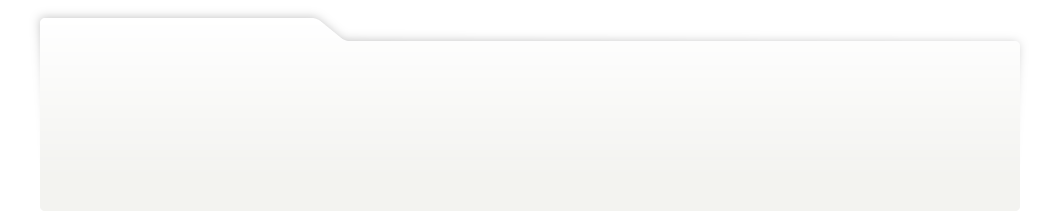
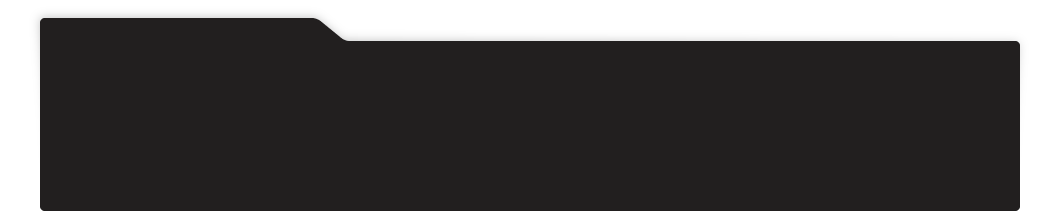
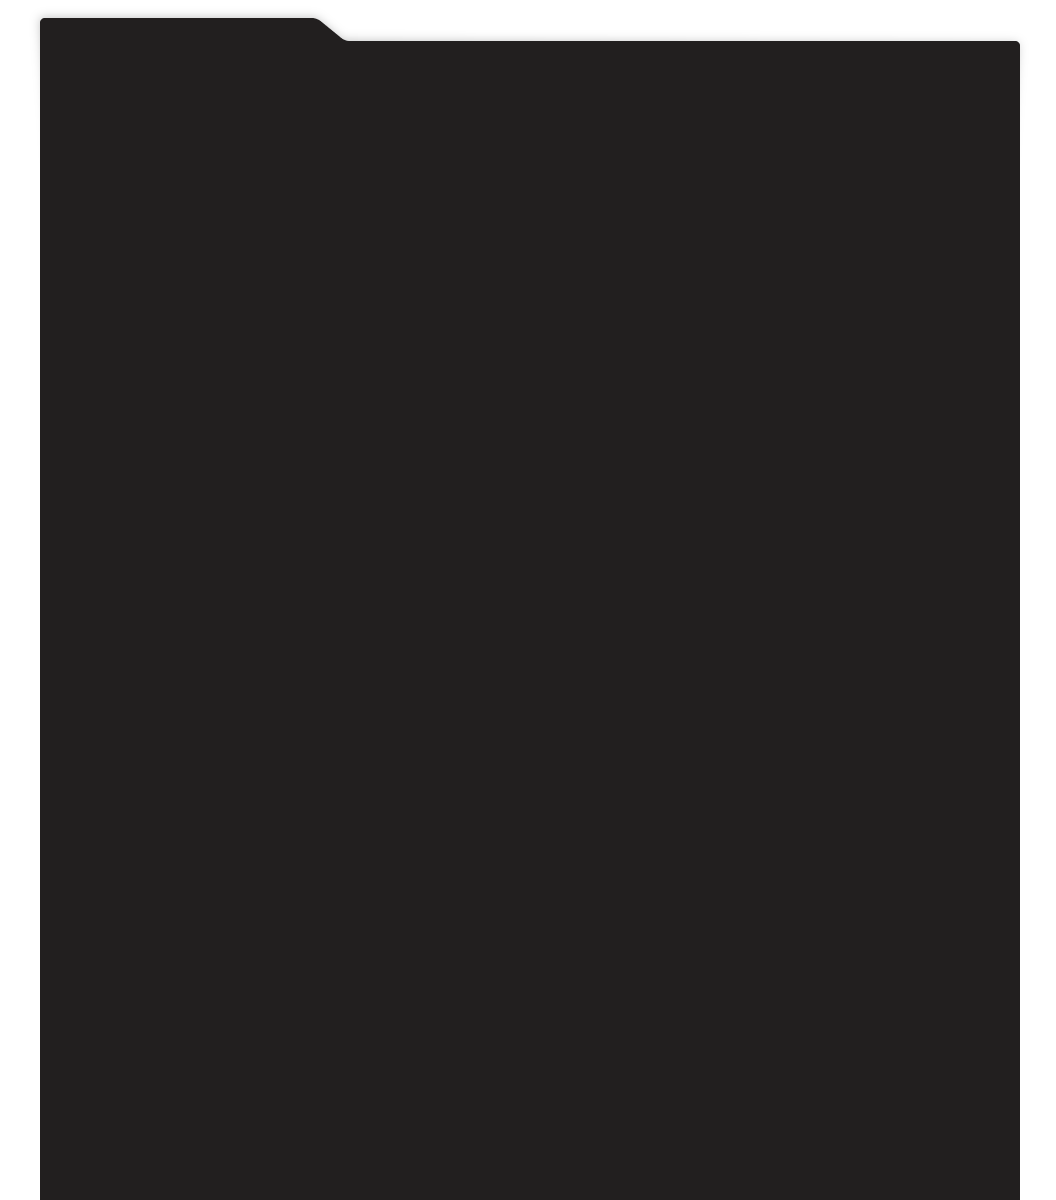
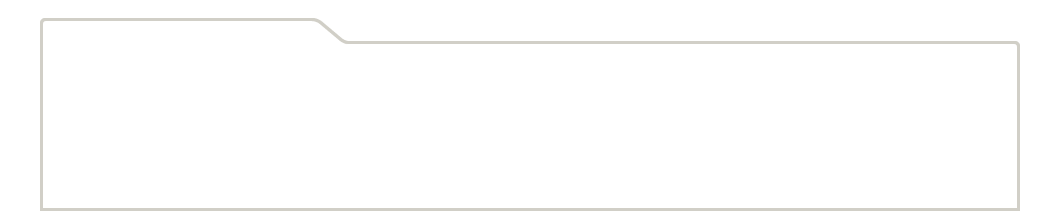
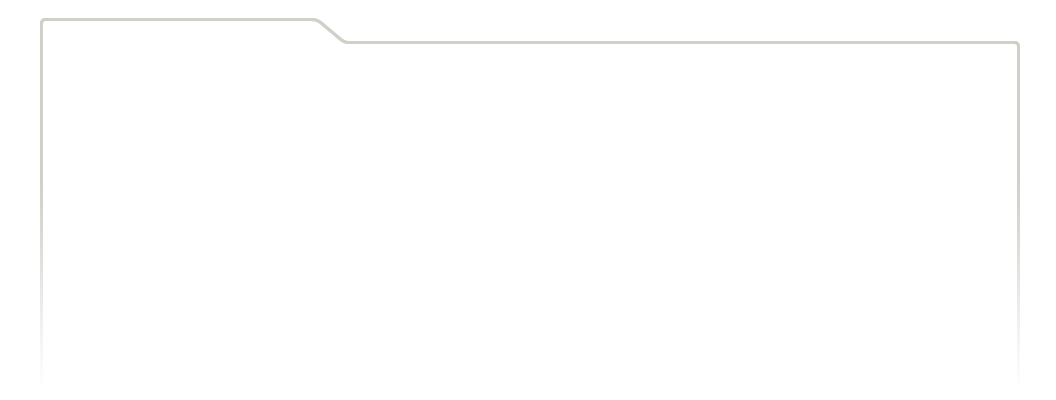
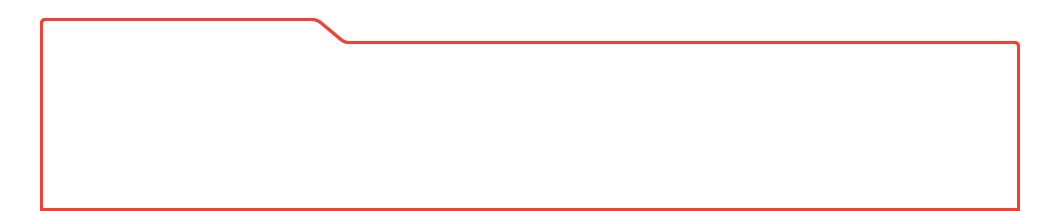
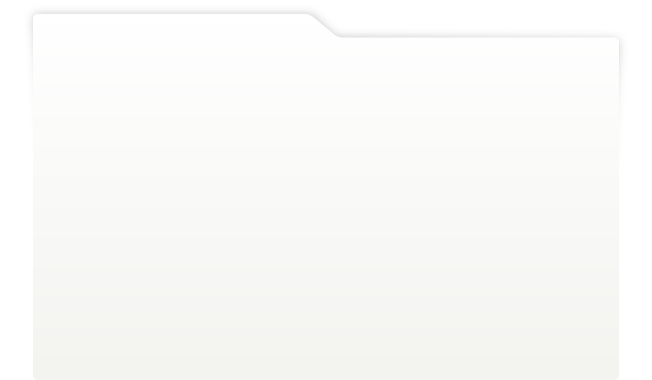
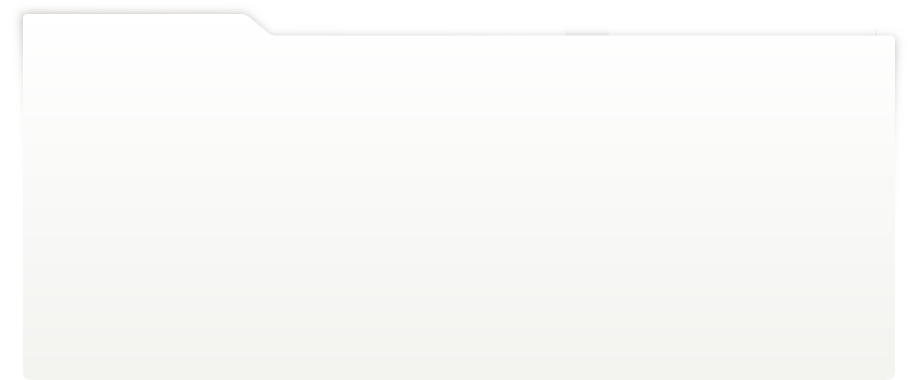
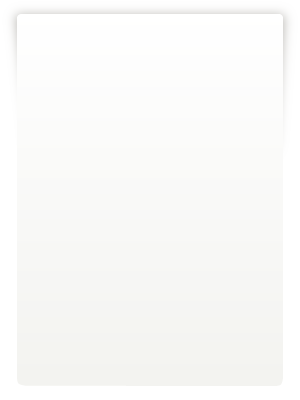
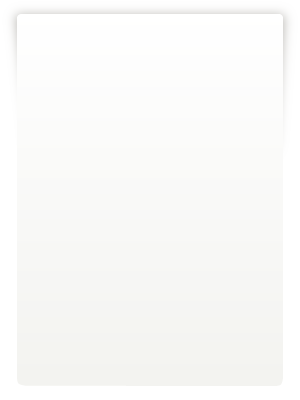
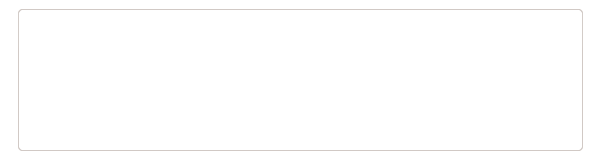
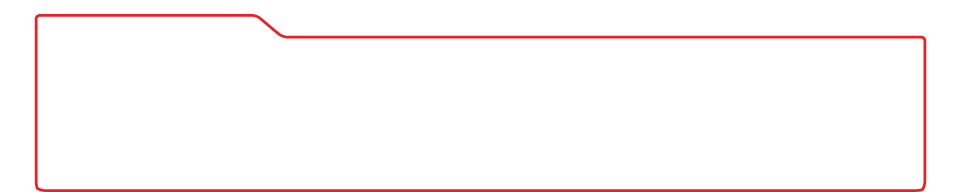
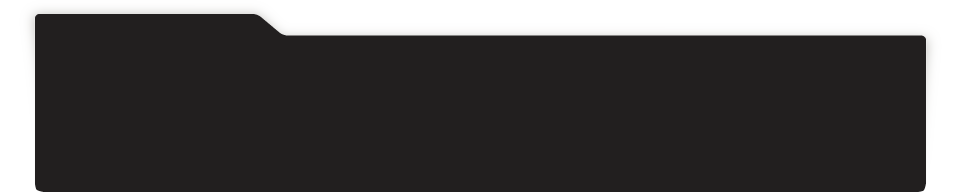
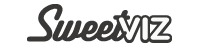
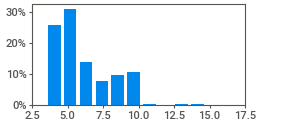
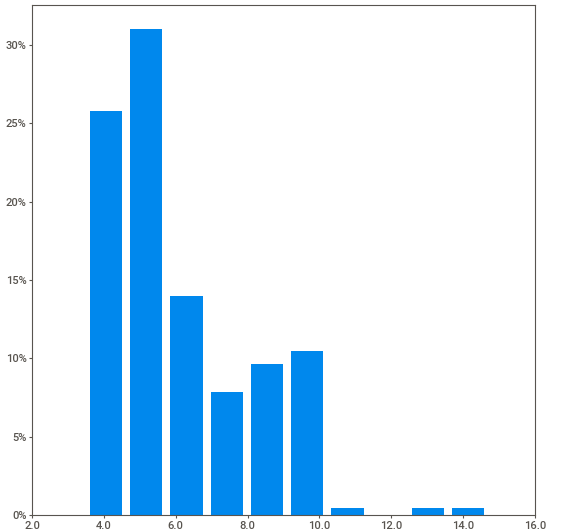
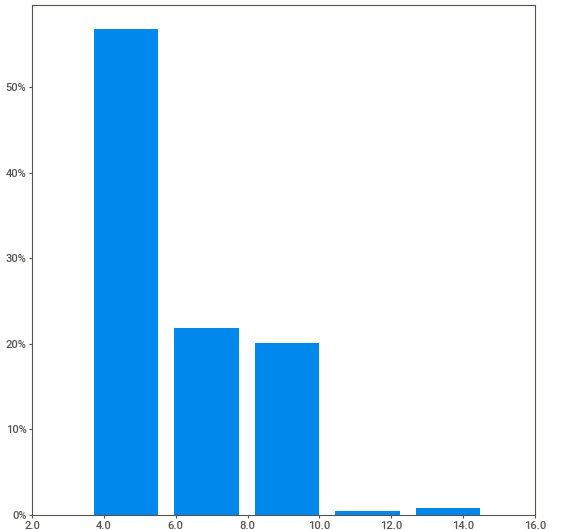
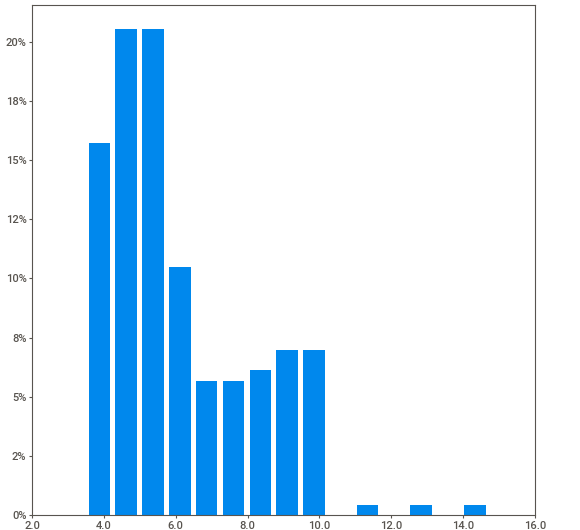
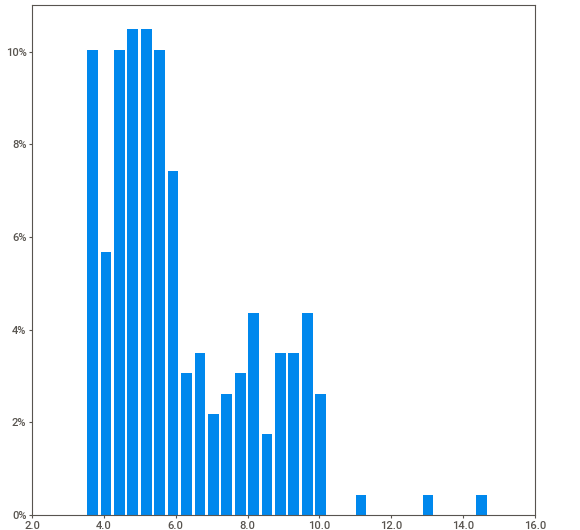
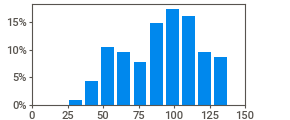
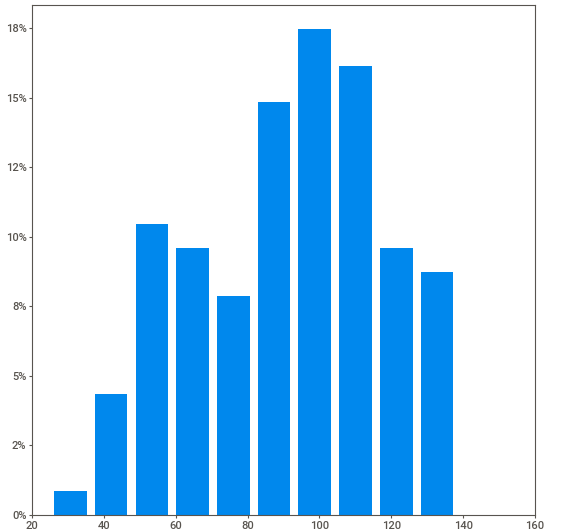
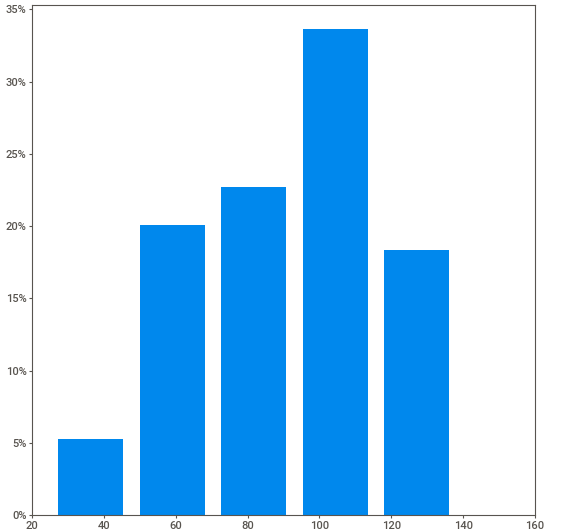
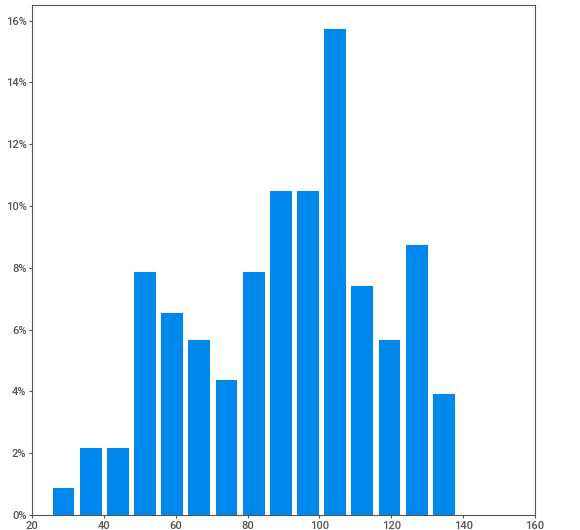
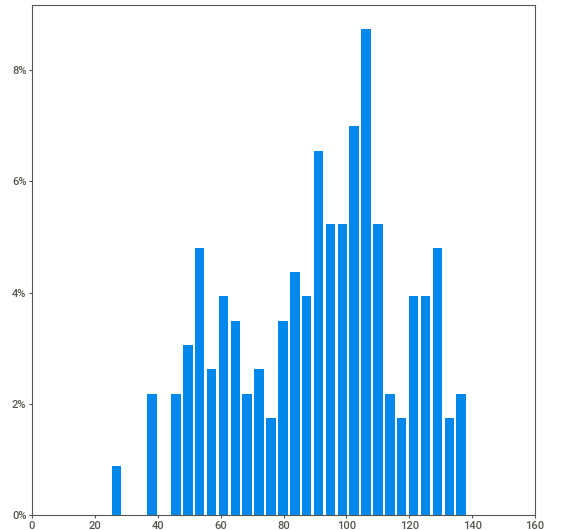
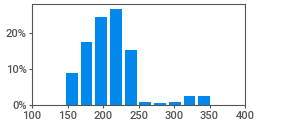
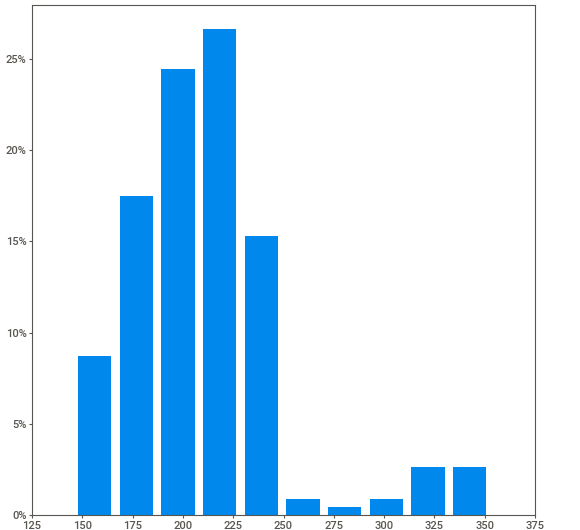
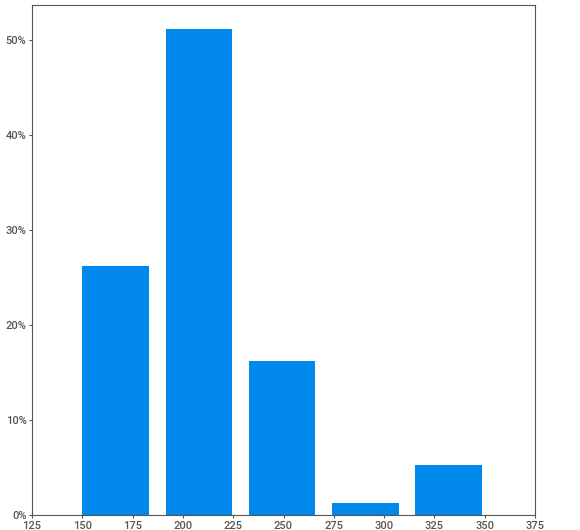
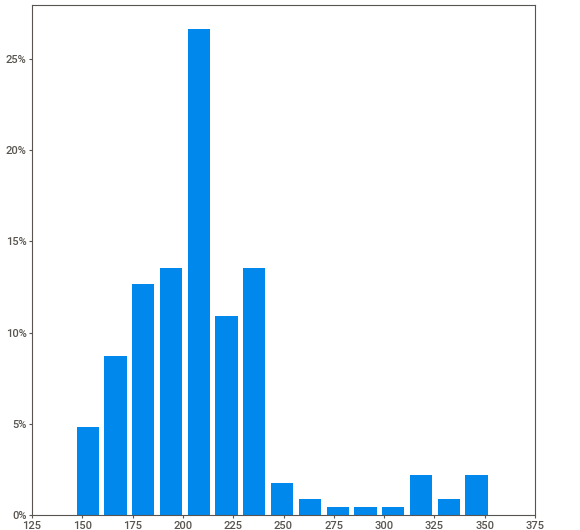
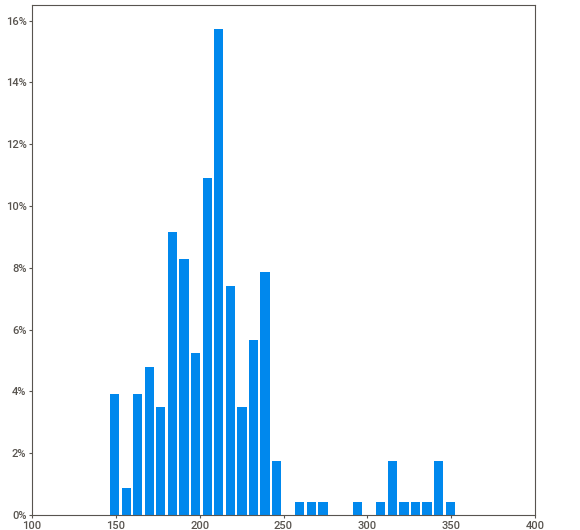
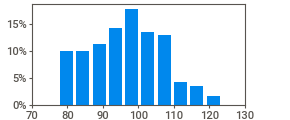
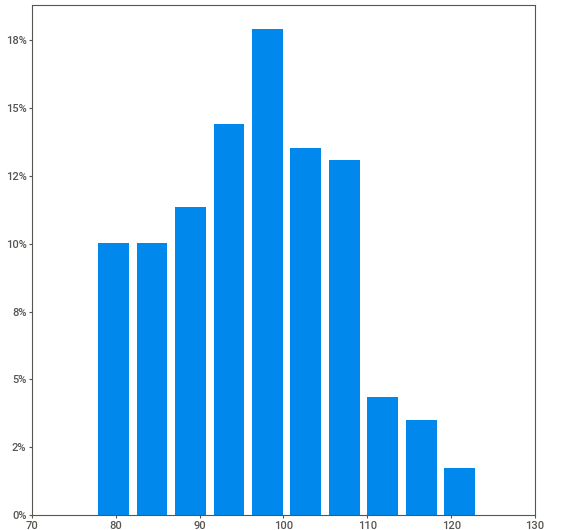
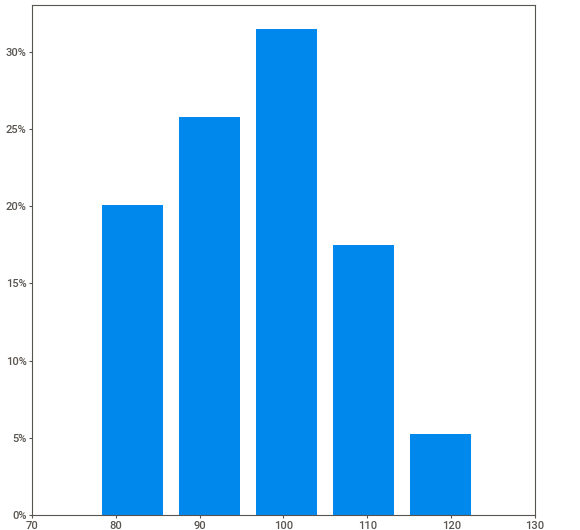
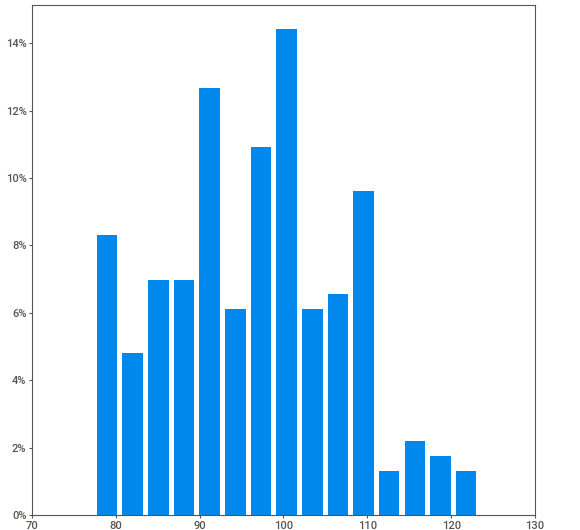
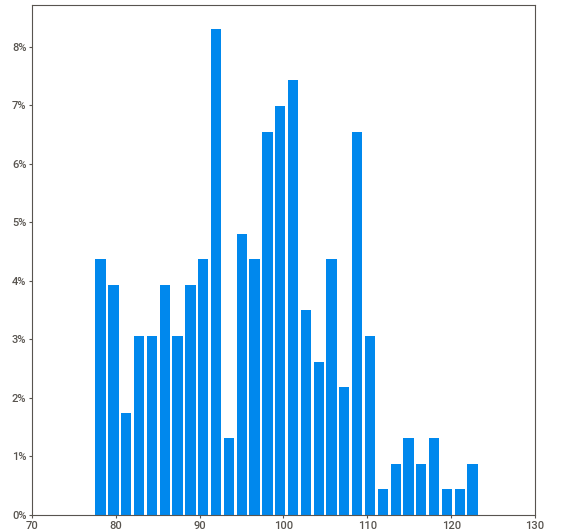
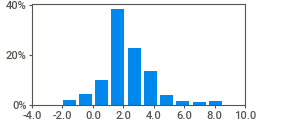
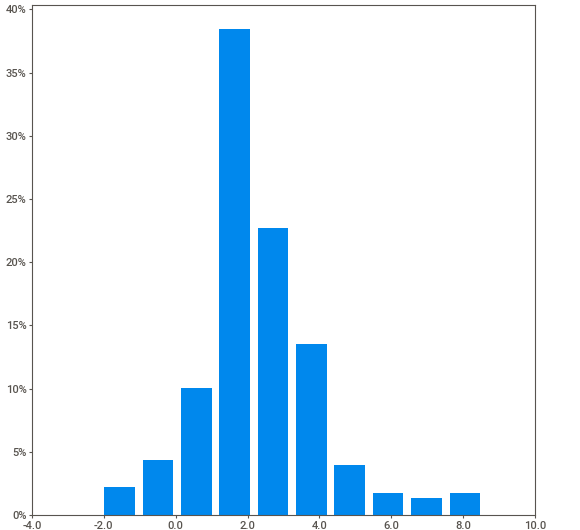
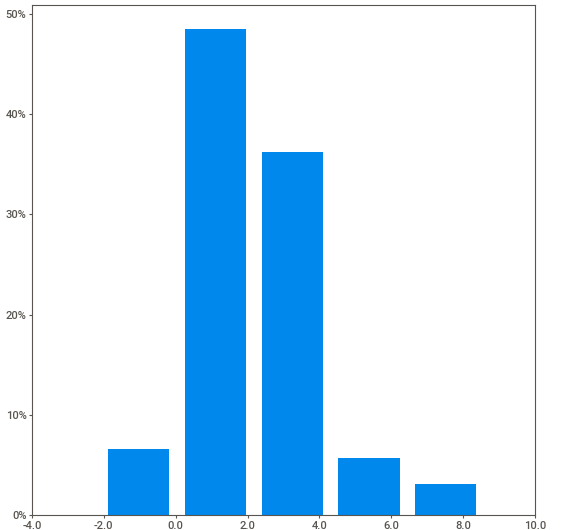
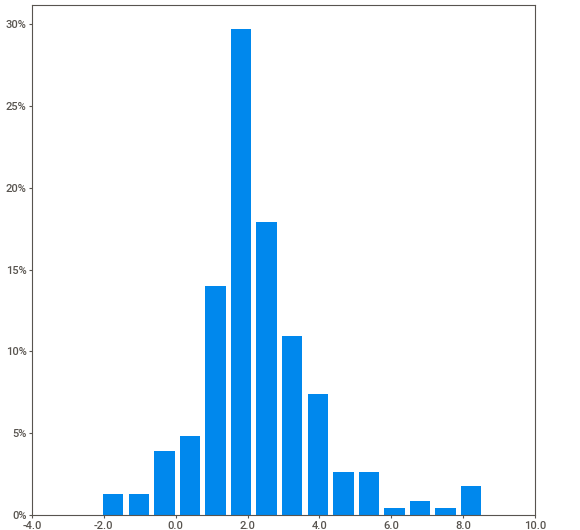
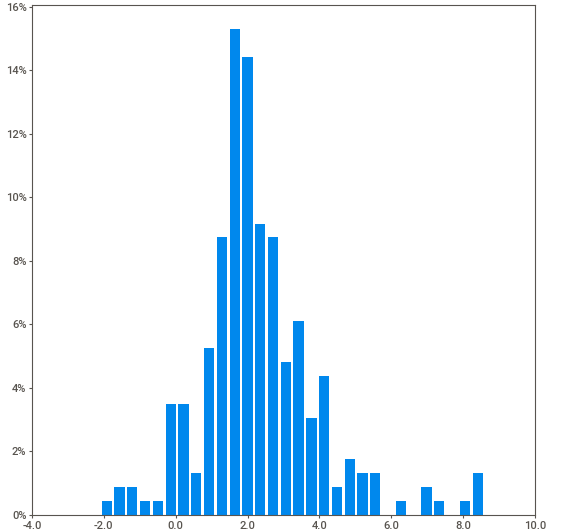
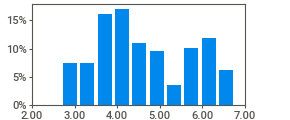
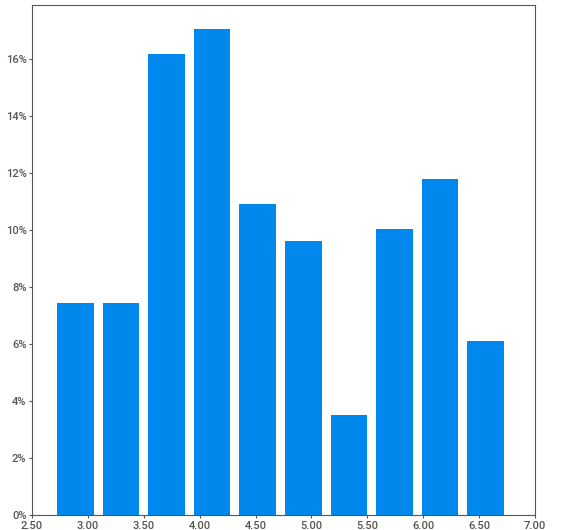
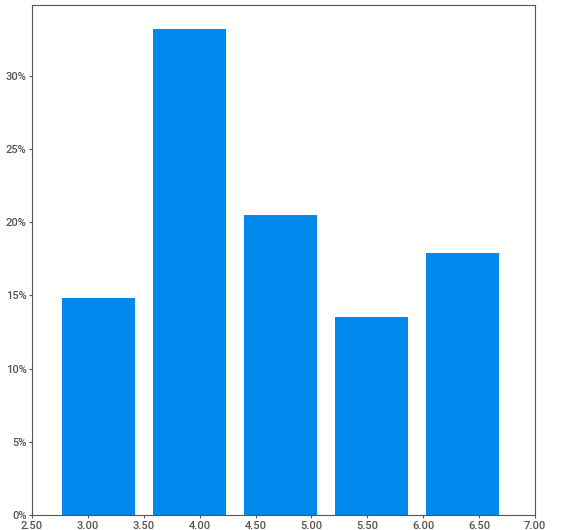
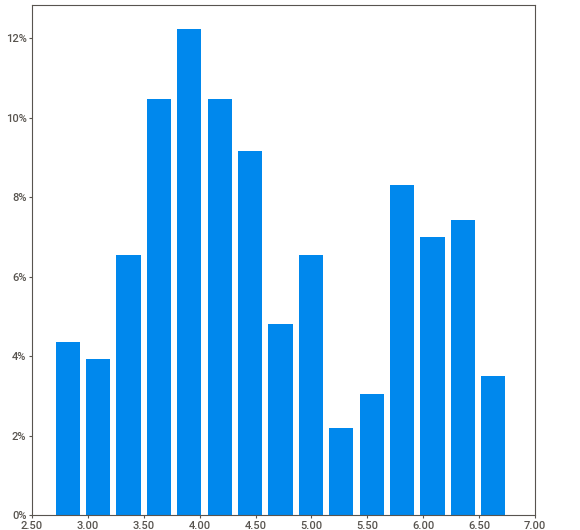
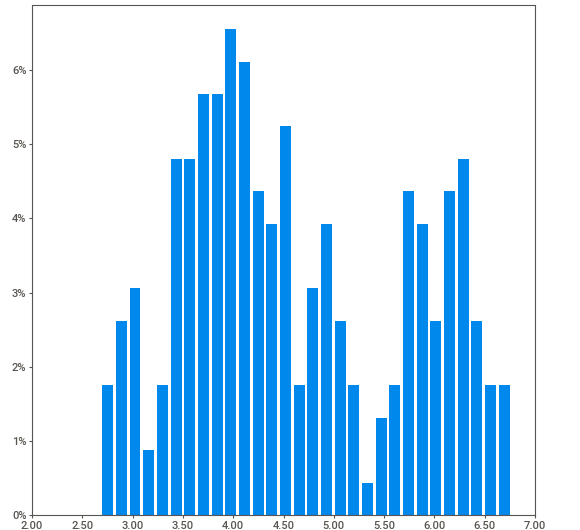
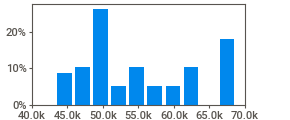
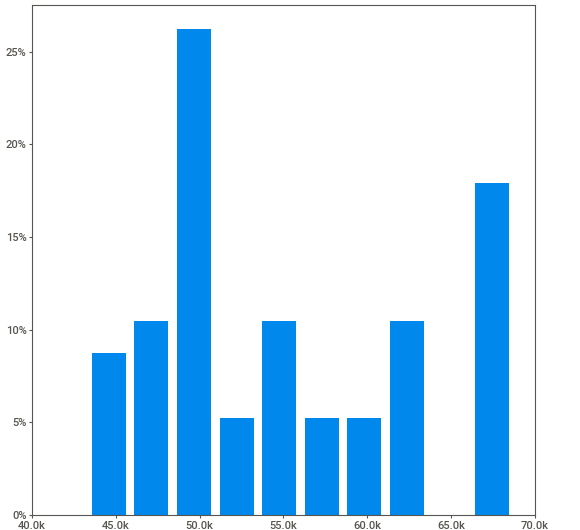
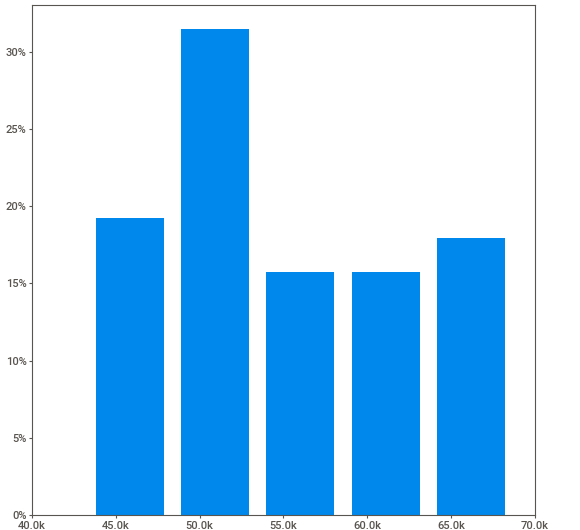
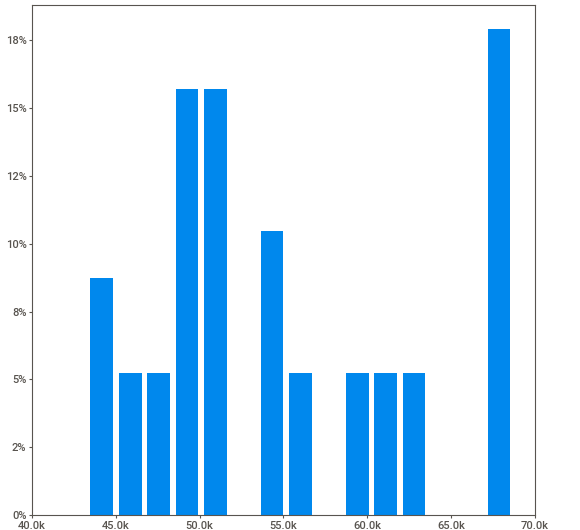
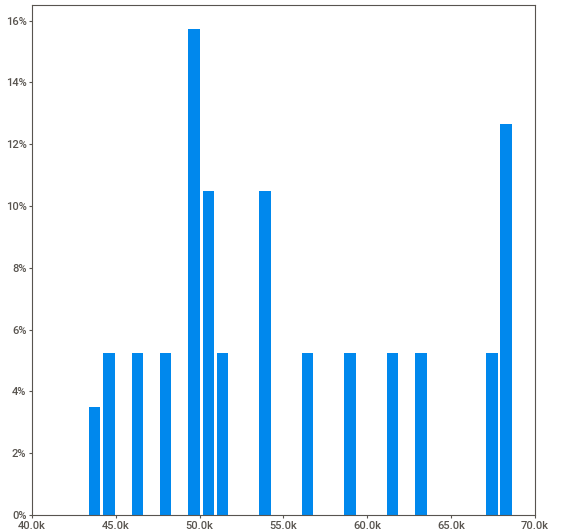
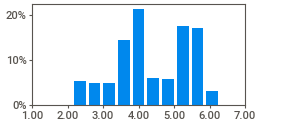
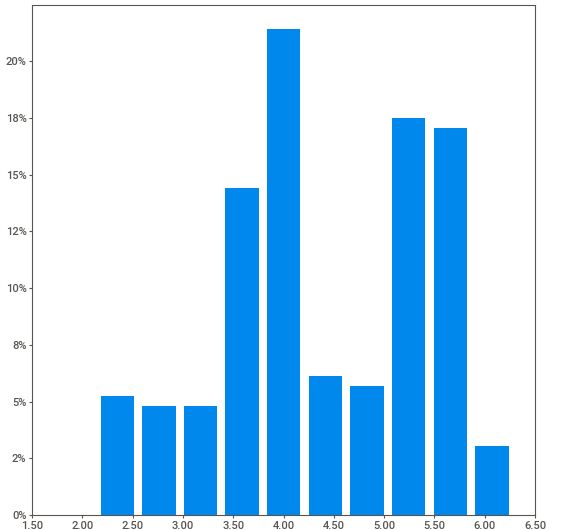
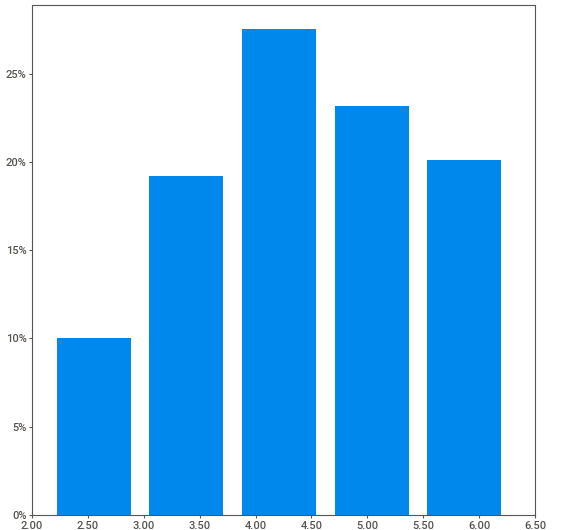
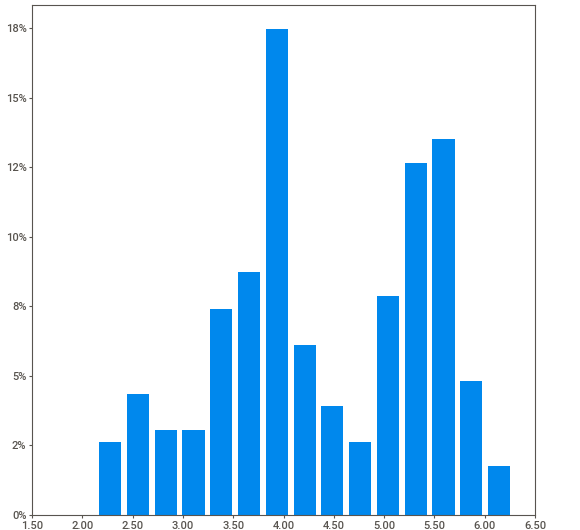
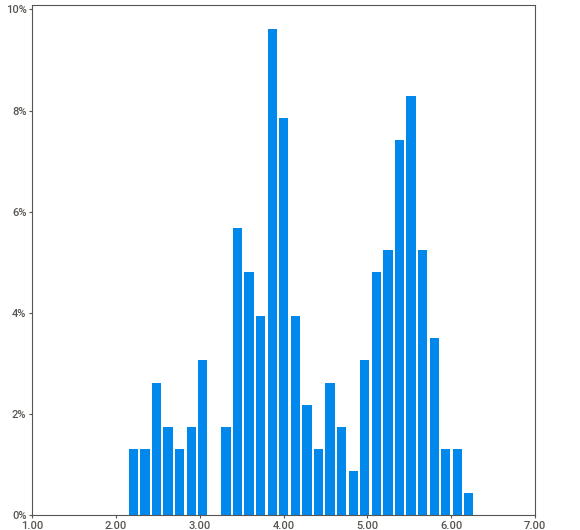
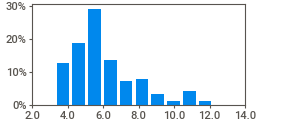
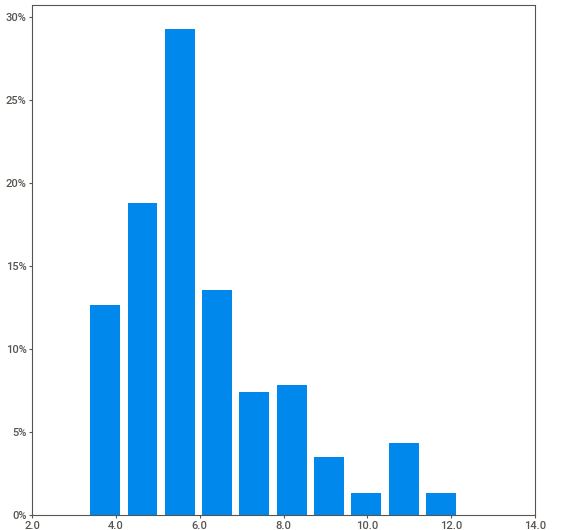
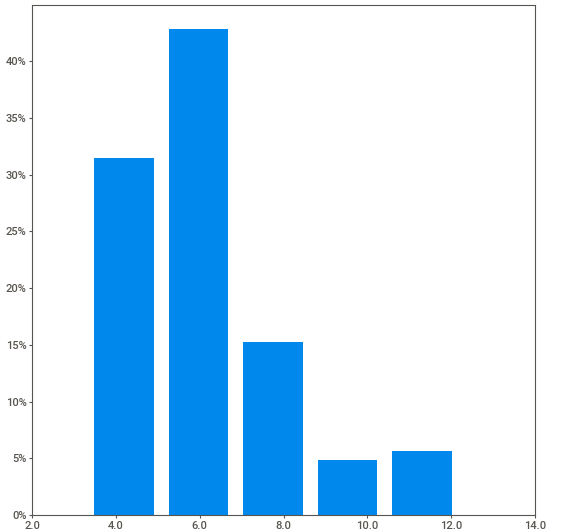
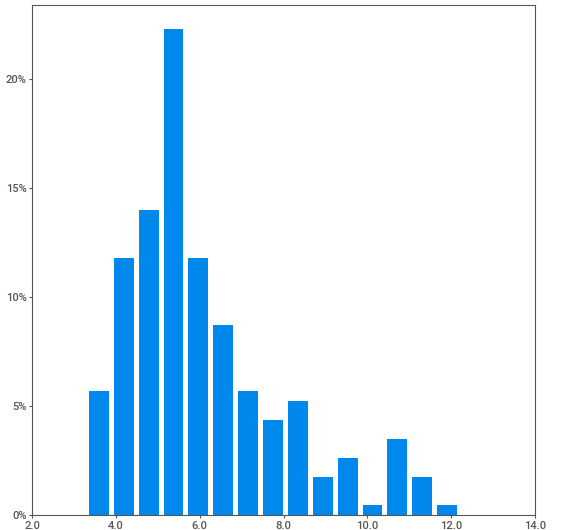
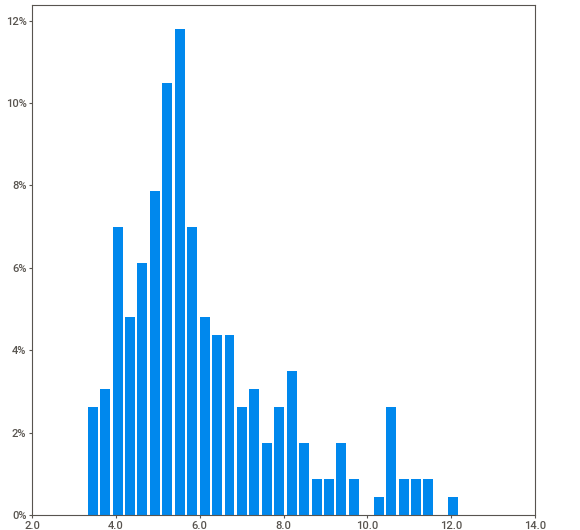
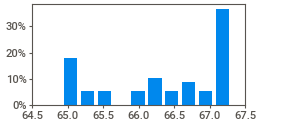
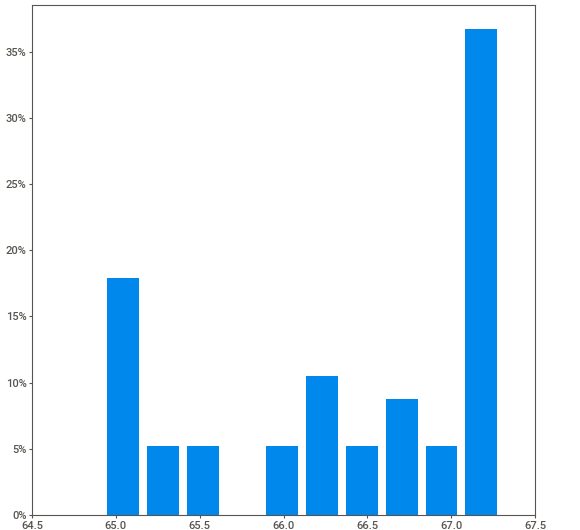
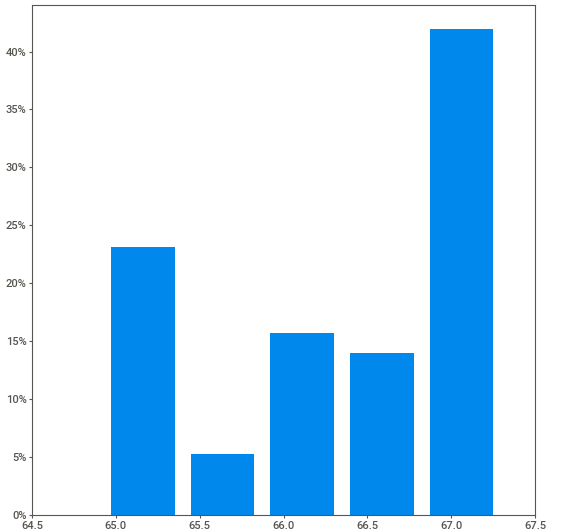
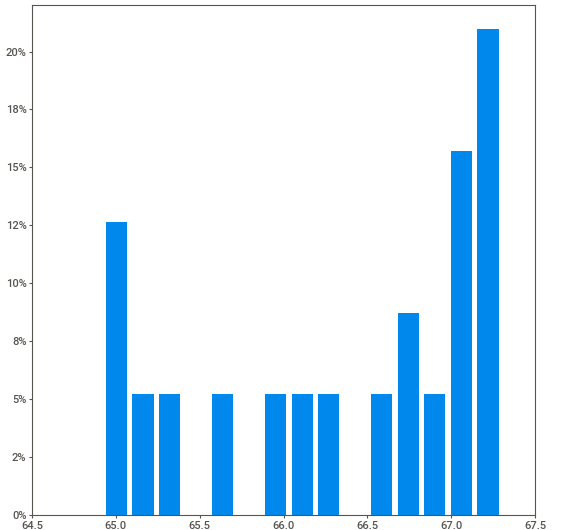
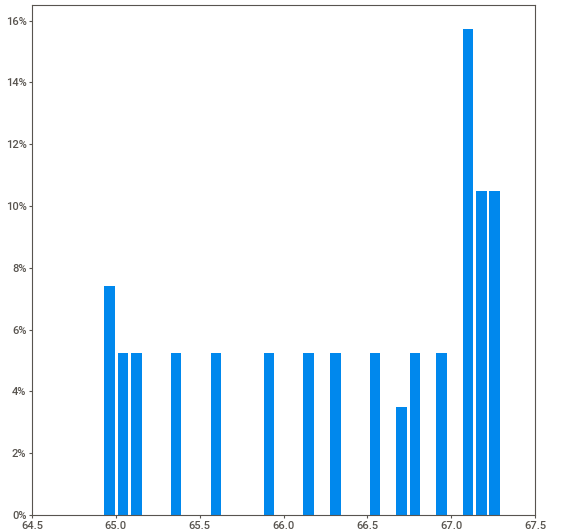
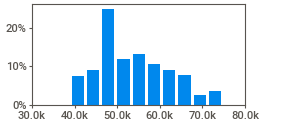
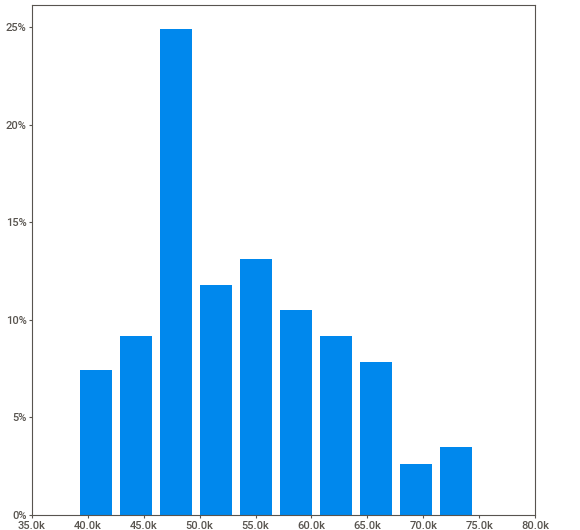
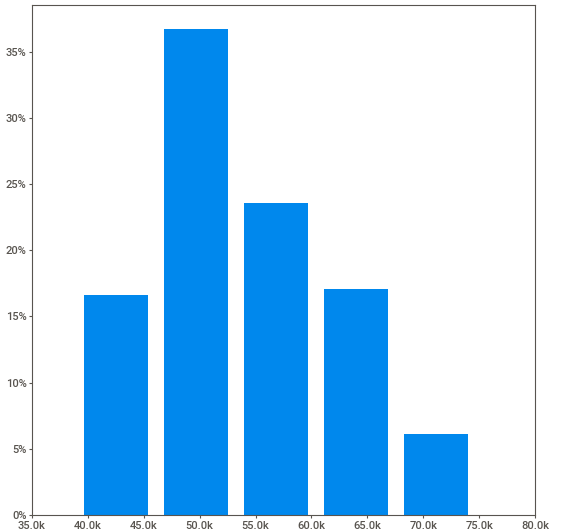
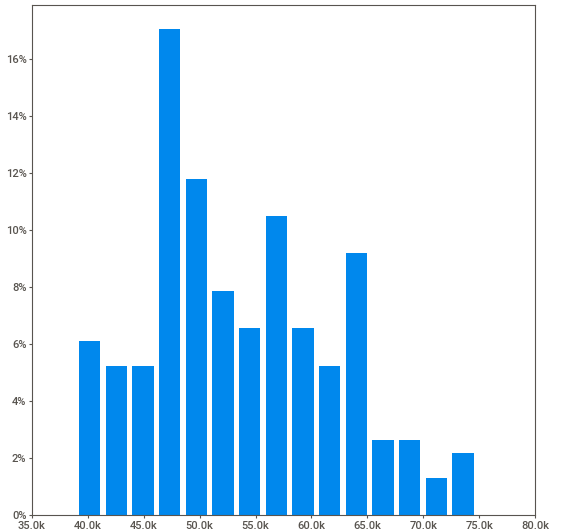
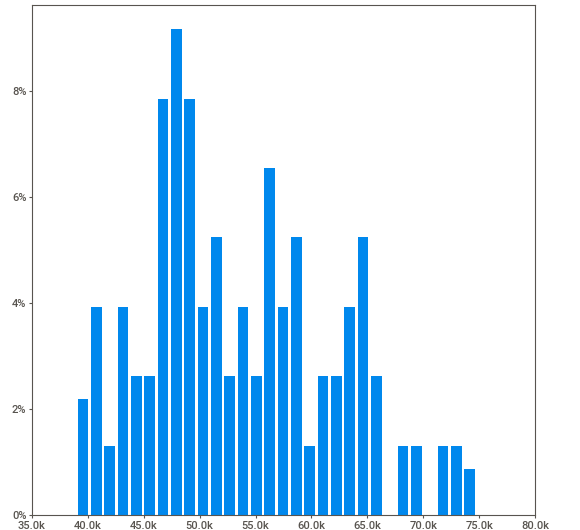
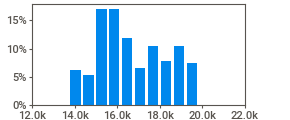
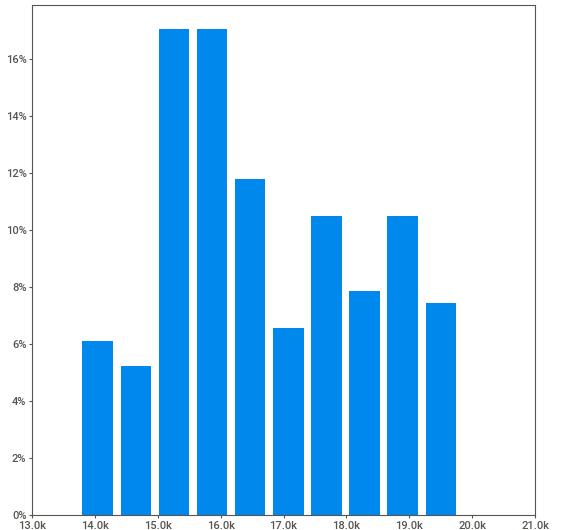
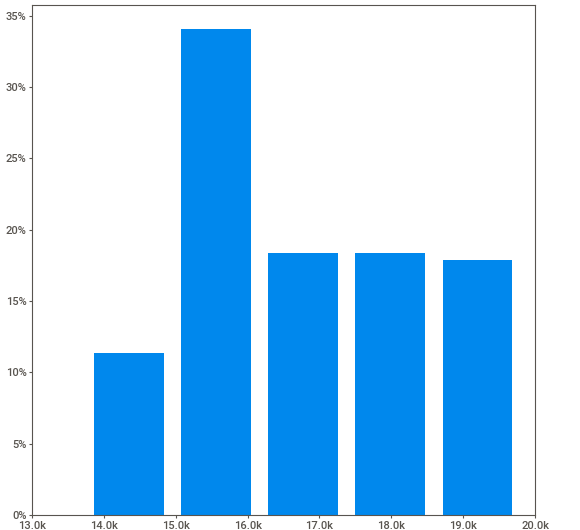
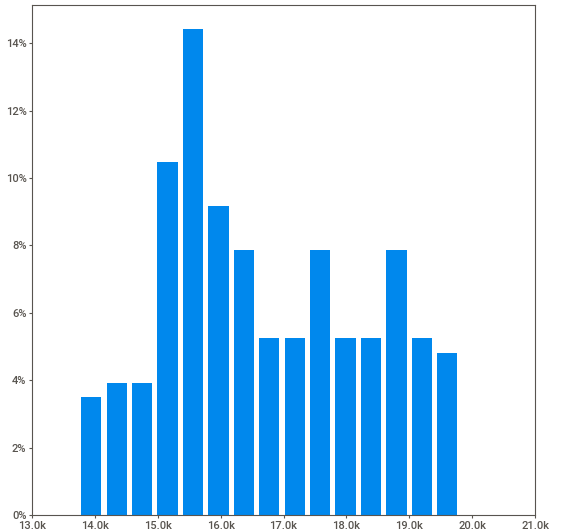
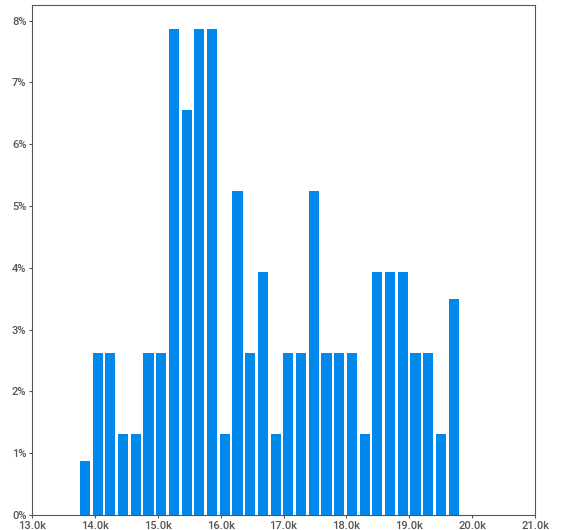
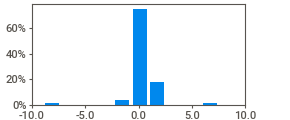
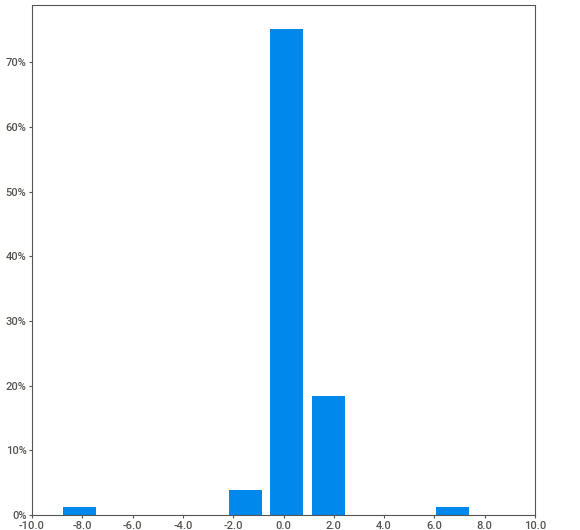
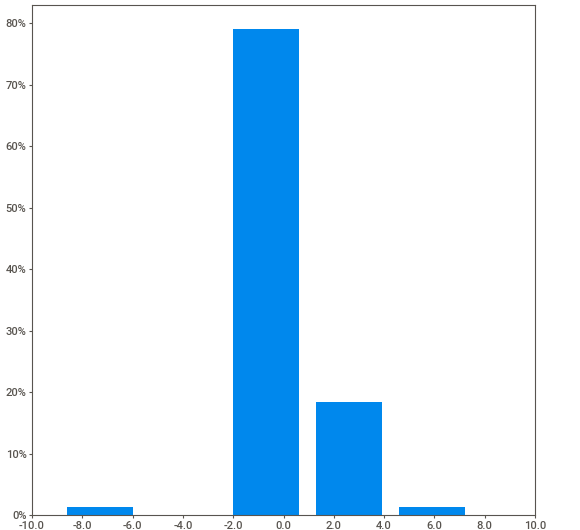
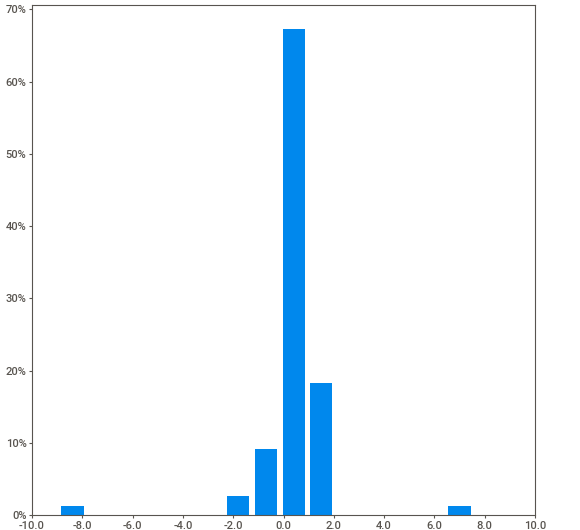
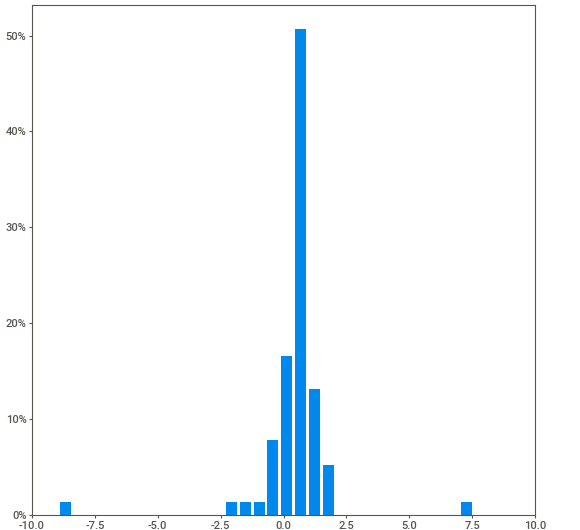
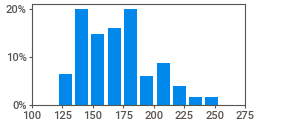
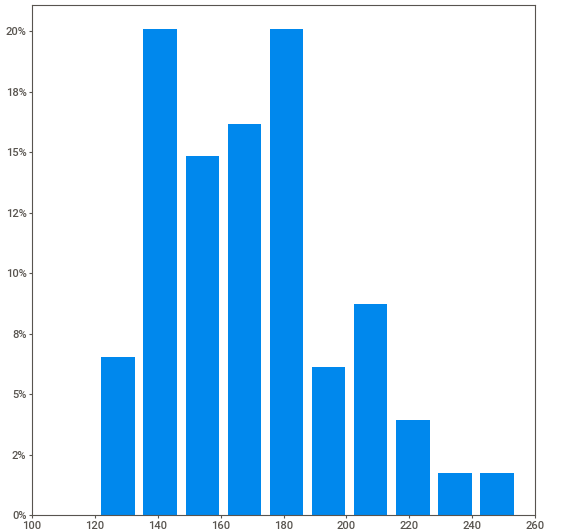
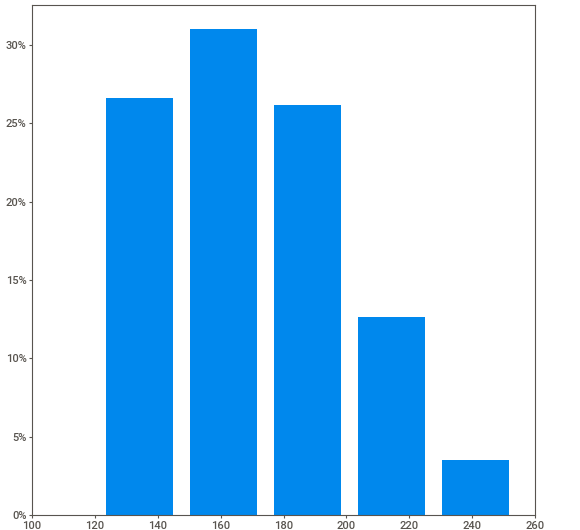
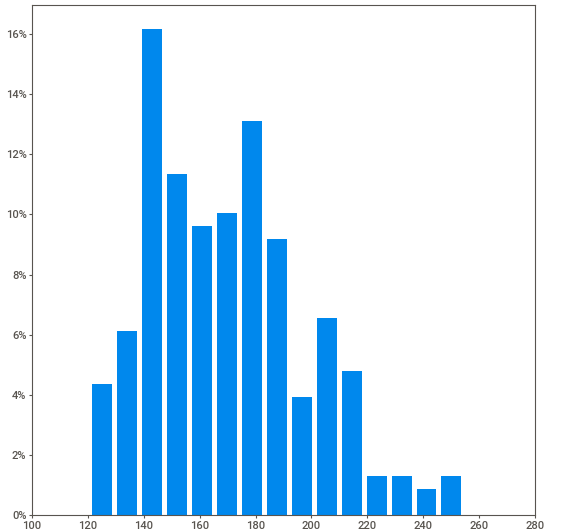
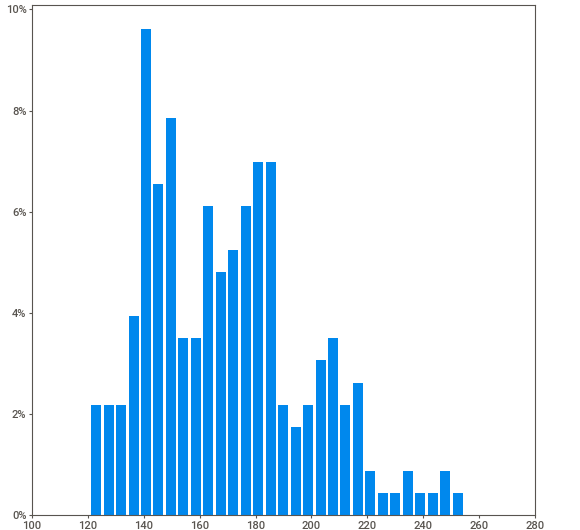
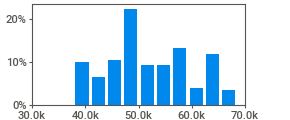
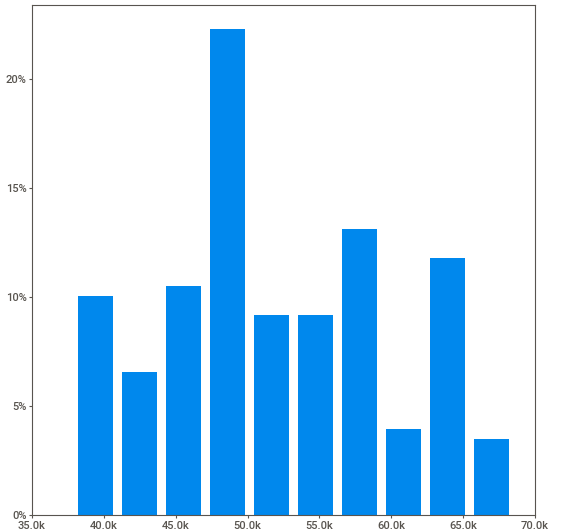
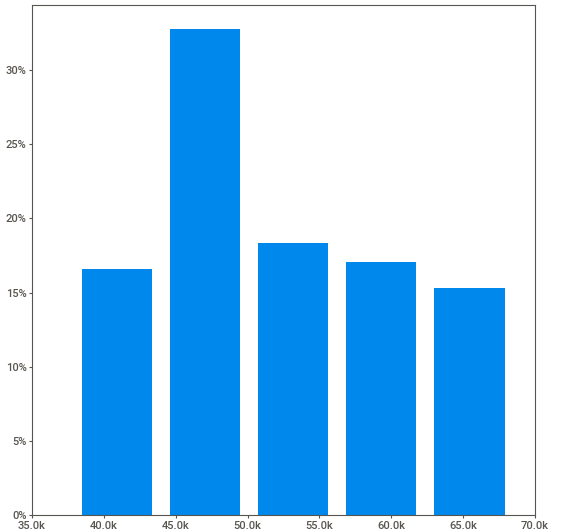
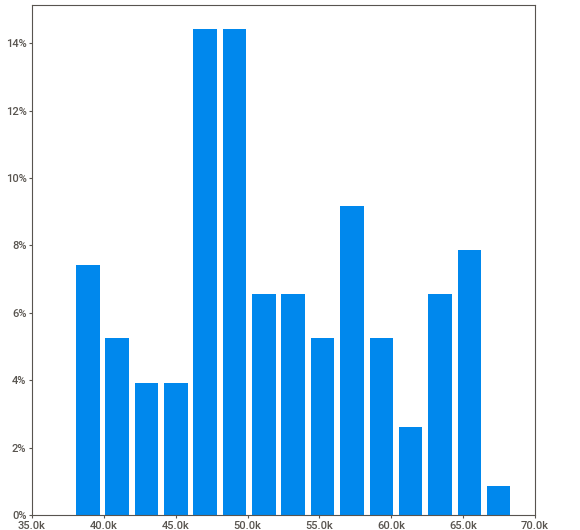
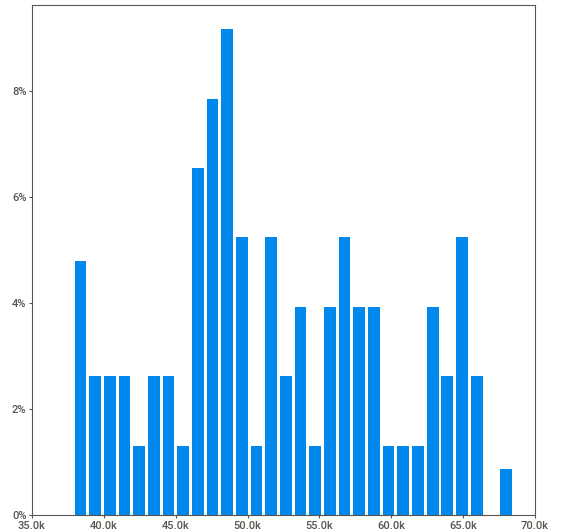
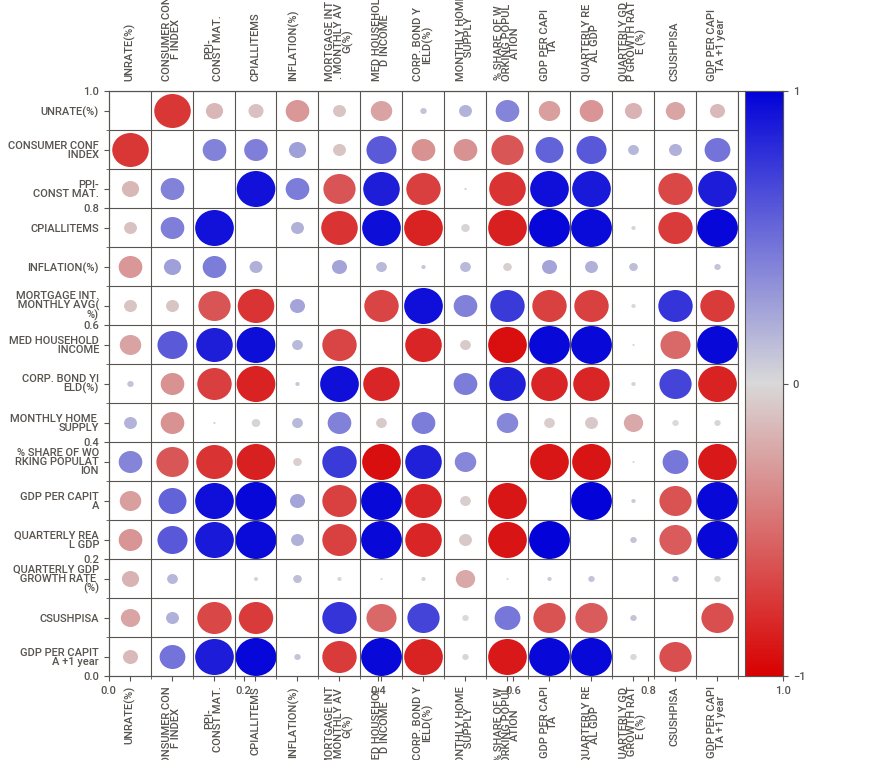
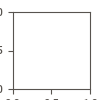

In [11]:
import sweetviz as sv

report = sv.analyze(data)
report.show_notebook()

In [12]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

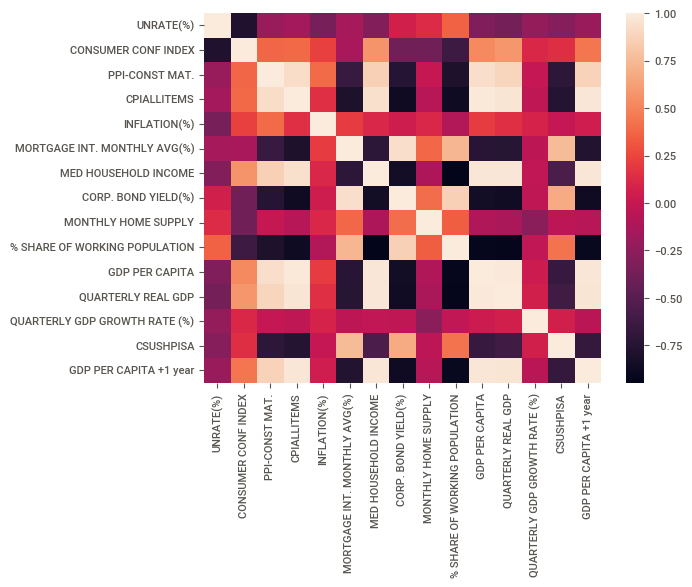

In [13]:
# correlation matrix
corr = data[numerical_columns].corr()
sns.heatmap(corr)
plt.show()

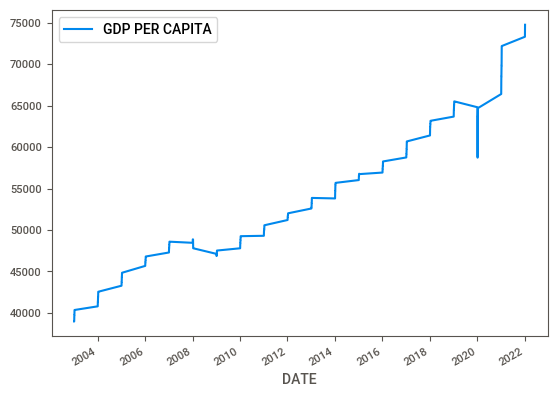

In [14]:
# time series plot

data.plot(x='DATE', y='GDP PER CAPITA')
plt.show()

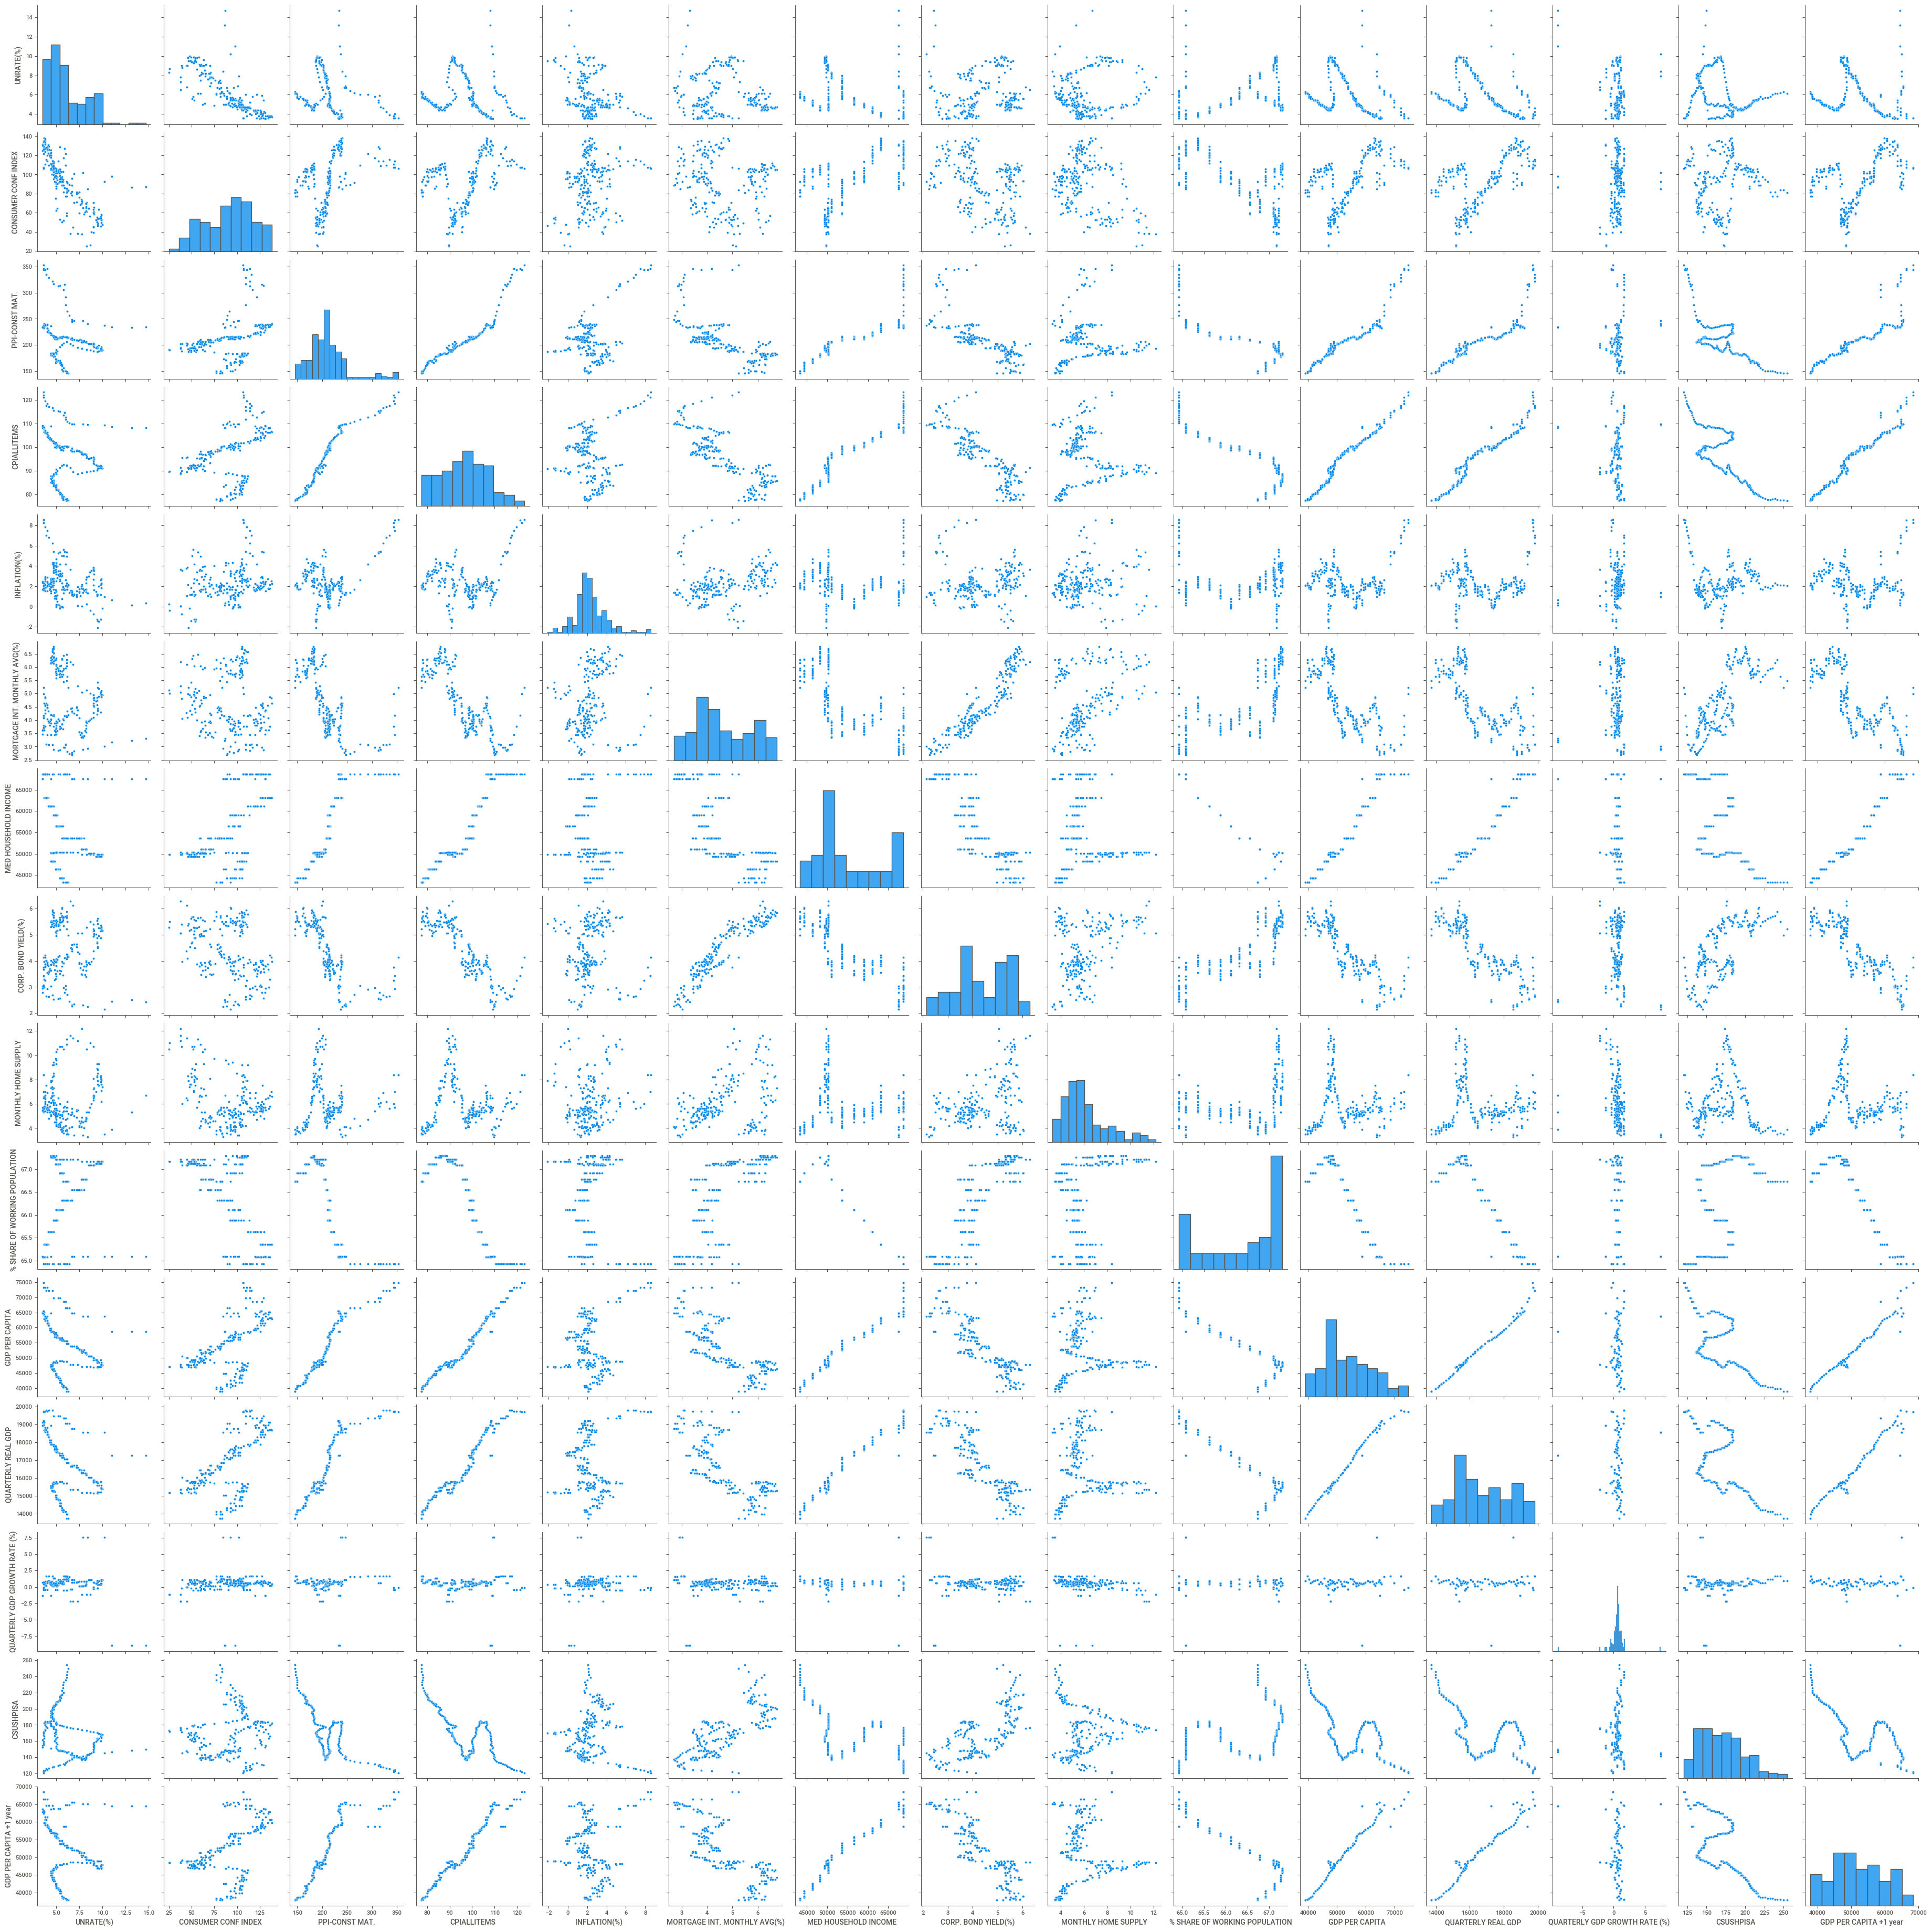

In [15]:
# pair plots

sns.pairplot(data)
plt.show()

### Time Series Analysis

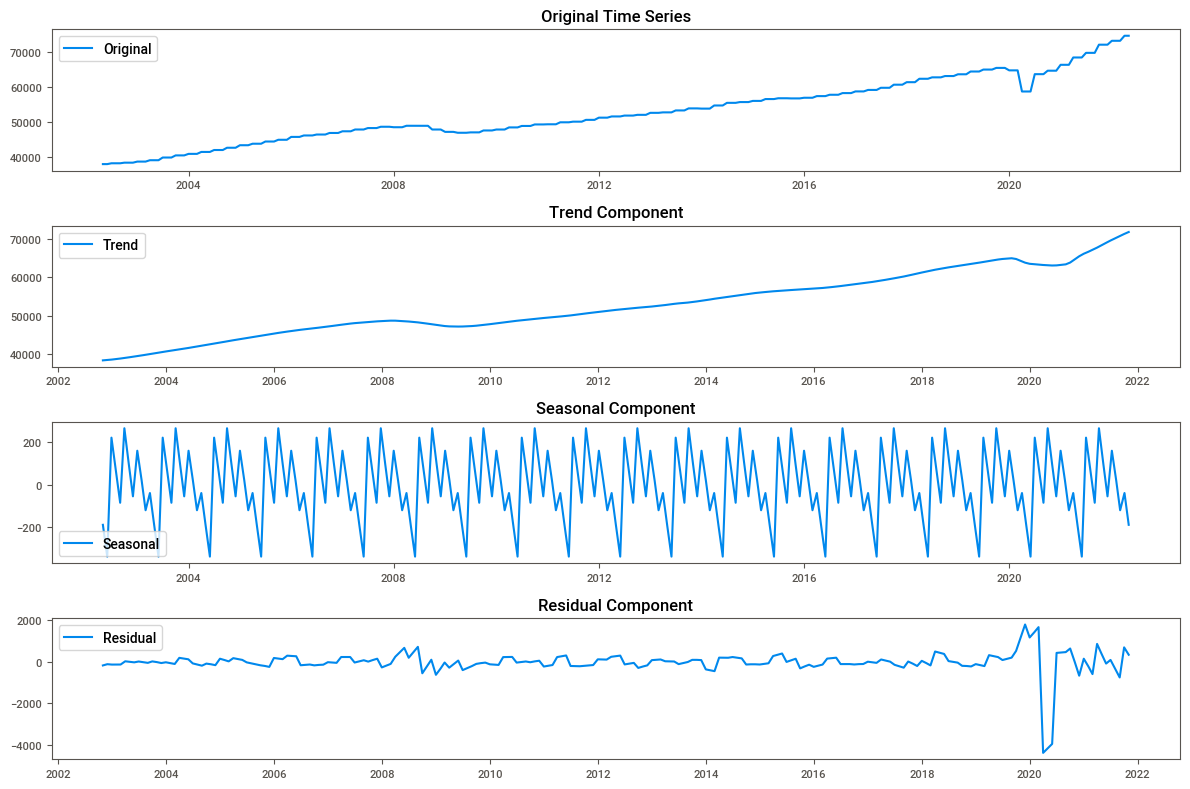

In [16]:
# seasonal decomposition
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load dataset
df = pd.read_csv('data.csv', parse_dates=['DATE'], date_format='%d-%m-%Y', index_col='DATE')

# Resample to monthly frequency if needed
if df.index.freq is None:
    df = df.resample('MS').mean()

# Fill missing values using forward fill method
df = df.ffill()

# Decompose the GDP per capita time series
decomposition = seasonal_decompose(df['GDP PER CAPITA'], model='additive')

# Plot decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8))
ax1.plot(df['GDP PER CAPITA'], label='Original')
ax1.set_title('Original Time Series')
ax1.legend()
ax2.plot(decomposition.trend, label='Trend')
ax2.set_title('Trend Component')
ax2.legend()
ax3.plot(decomposition.seasonal, label='Seasonal')
ax3.set_title('Seasonal Component')
ax3.legend()
ax4.plot(decomposition.resid, label='Residual')
ax4.set_title('Residual Component')
ax4.legend()
plt.tight_layout()
plt.show()

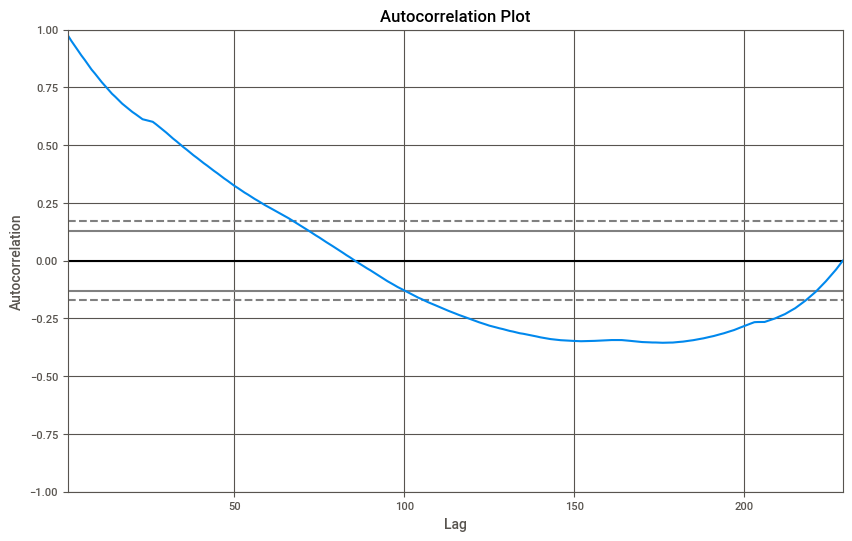

In [17]:
# autocorrelation
from pandas.plotting import autocorrelation_plot

# Plot autocorrelation
plt.figure(figsize=(10, 6))
autocorrelation_plot(data['GDP PER CAPITA'])
plt.title('Autocorrelation Plot')
plt.show()

### Cluster Analysis

In [18]:
# cluster analysis using PCA
from sklearn.preprocessing import StandardScaler

pca_data = data.drop(['DATE', 'GDP PER CAPITA +1 year'], axis=1)

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(pca_data)

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Use 2 components for 2D visualization
pca_result = pca.fit_transform(scaled_features)

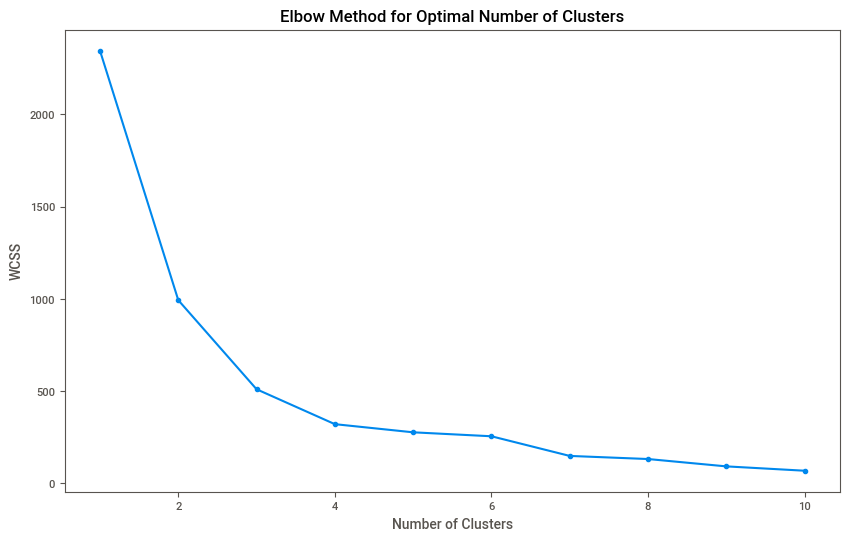

In [20]:
# elbow method
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

# Testing from 1 to 10 clusters
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_result)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

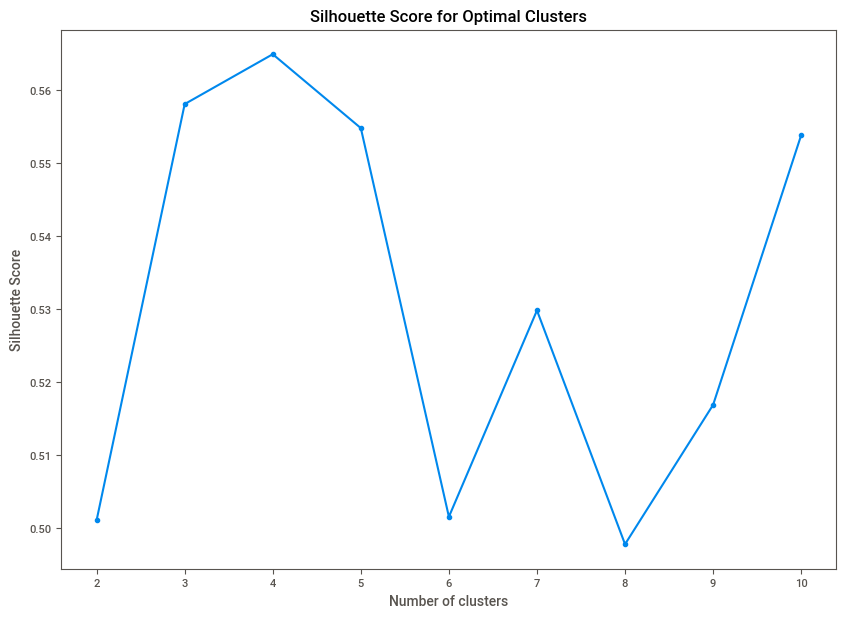

In [21]:
# silhouette score
from sklearn.metrics import silhouette_score

# Calculate Silhouette Scores for a range of cluster numbers
silhouette_scores = []
for n_clusters in range(2, 11):  # At least 2 clusters needed for silhouette score
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(pca_result)
    silhouette_avg = silhouette_score(pca_result, clusters)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette Scores
plt.figure(figsize=(10, 7))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [22]:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(pca_result)

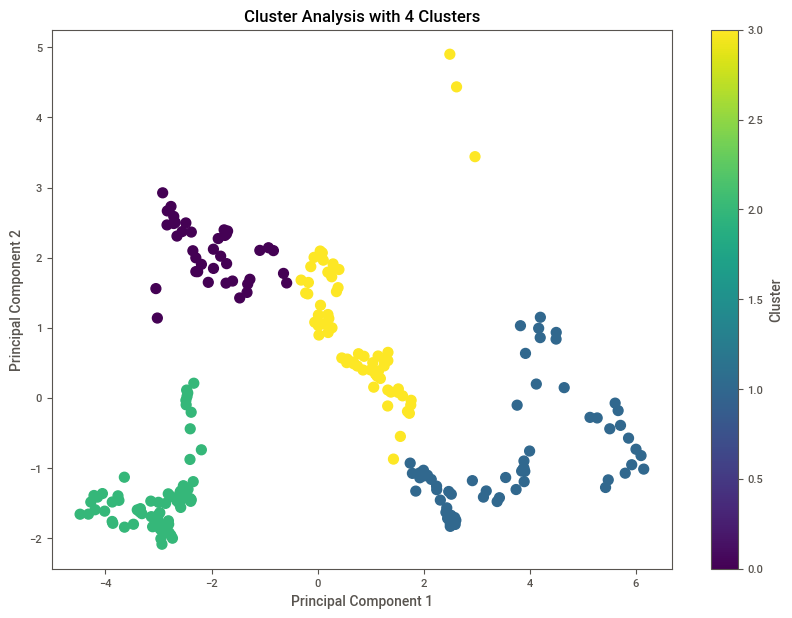

In [23]:
plt.figure(figsize=(10, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis', s=50)
plt.colorbar(label='Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'Cluster Analysis with {optimal_clusters} Clusters')
plt.show()

In [24]:
data['Cluster'] = clusters

<Axes: xlabel='DATE', ylabel='Count'>

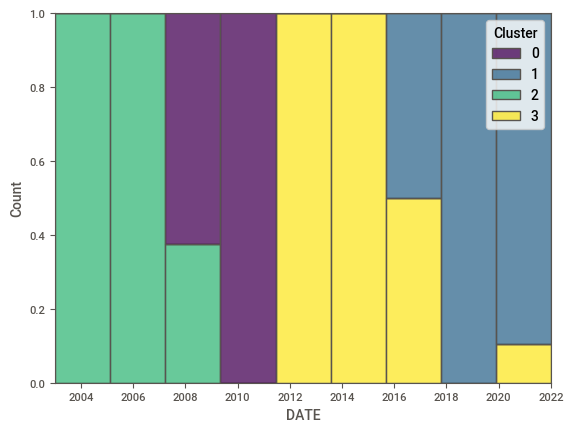

In [25]:
sns.histplot(data=data, x='DATE', hue='Cluster', multiple='fill', palette='viridis')

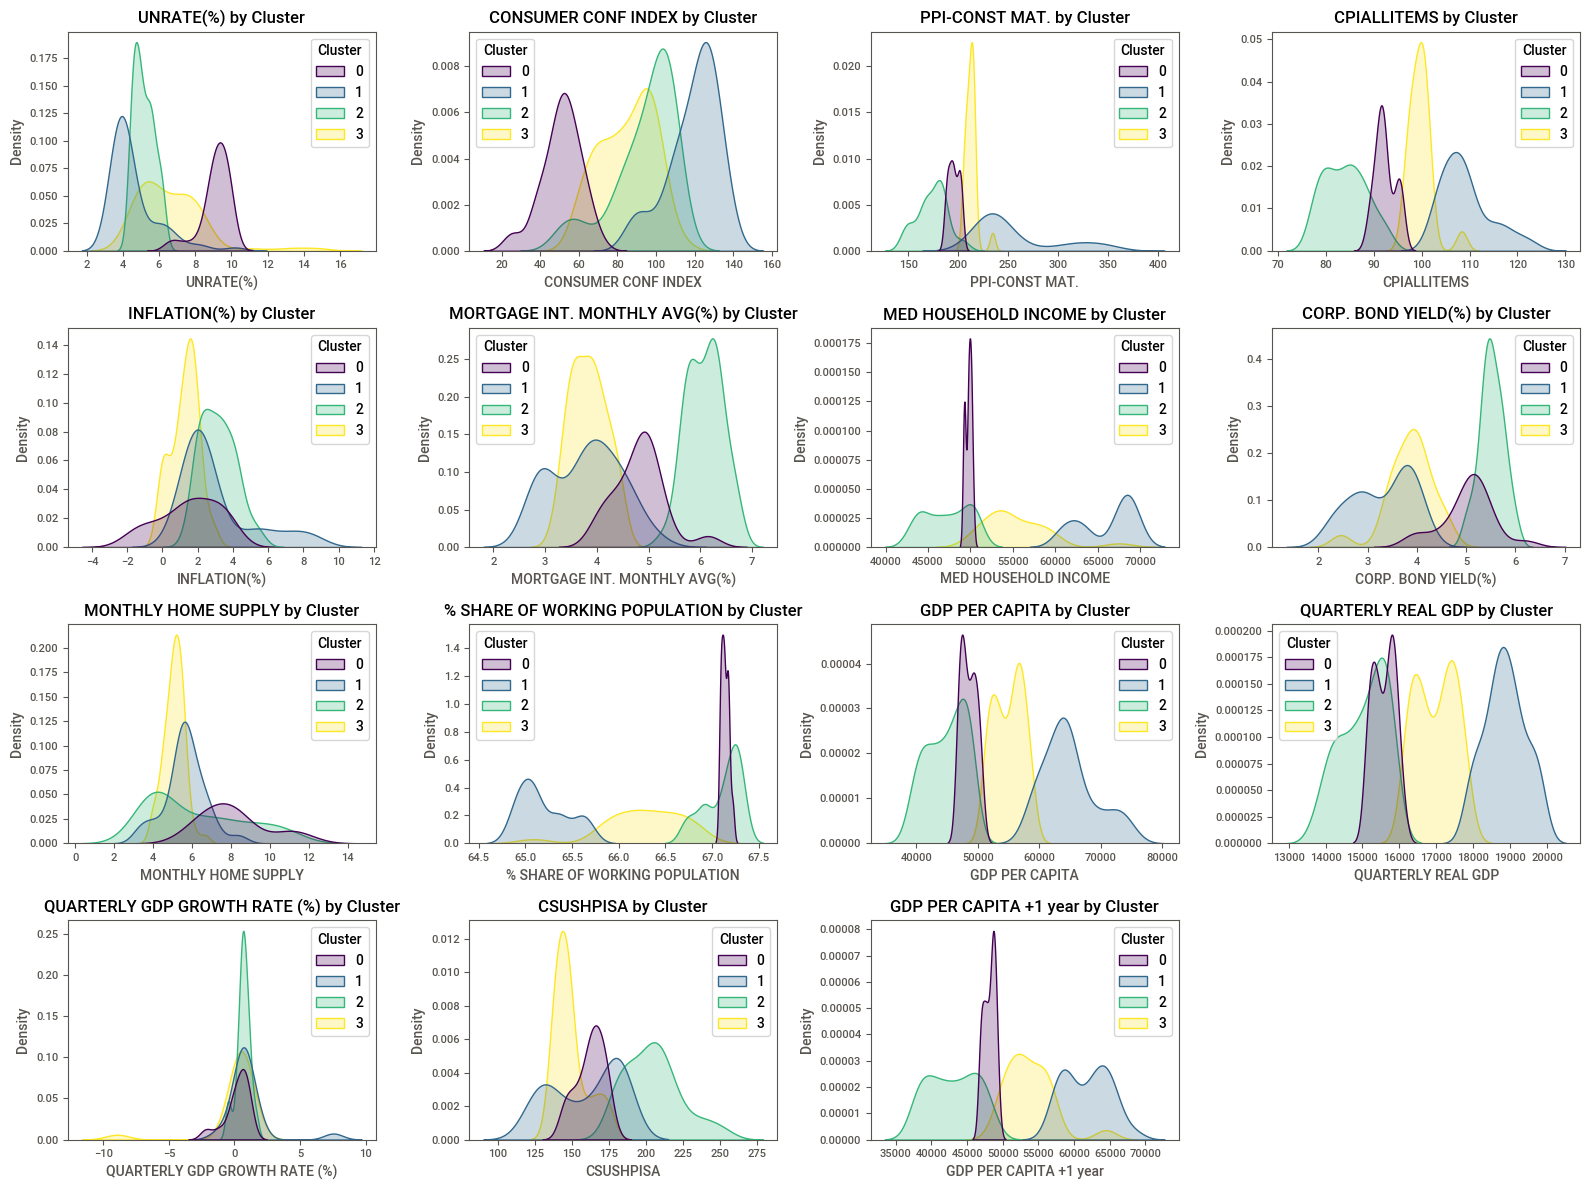

In [26]:
# Determine the number of rows and columns for subplots
num_plots = len(numerical_columns)
cols = 4  # Number of columns in the grid
rows = np.ceil(num_plots / cols).astype(int)  # Number of rows in the grid

# Create a figure with a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))
axes = axes.flatten()  # Flatten the array of axes for easy iteration

# Loop through the columns and plot each one
for i, column in enumerate(numerical_columns):
    sns.kdeplot(data=data, x=column, hue='Cluster', fill=True, ax=axes[i], palette='viridis')
    axes[i].set_title(f'{column} by Cluster')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Display the plots
plt.tight_layout()
plt.show()

---

## Preprocessing

In [27]:
data.head()

DATE  UNRATE(%)  CONSUMER CONF INDEX  PPI-CONST MAT.  CPIALLITEMS  \
228 2003-01-05        6.1                 81.0           145.8    77.420607   
227 2003-01-06        6.3                 83.6           146.1    77.504989   
226 2003-01-07        6.2                 83.5           147.0    77.589371   
225 2003-01-08        6.1                 77.0           147.2    77.884709   
224 2003-01-09        6.1                 81.7           149.0    78.137855   

     INFLATION(%)  MORTGAGE INT. MONTHLY AVG(%)  MED HOUSEHOLD INCOME  \
228      2.057842                        5.4840               43318.0   
227      2.112285                        5.2300               43318.0   
226      2.109939                        5.6325               43318.0   
225      2.158273                        6.2640               43318.0   
224      2.320442                        6.1475               43318.0   

     CORP. BOND YIELD(%)  MONTHLY HOME SUPPLY  % SHARE OF WORKING POPULATION  \
228                 5.22                  3.9                      66.739214   
227                 4.97                  3.5                      66.739214   
226                 5.49                  3.6                      66.739214   
225                 5.88                  3.5                      66.739214   
224                 5.72                  3.8                      66.739214   

     GDP PER CAPITA  QUARTERLY REAL GDP  QUARTERLY GDP GROWTH RATE (%)  \
228         38976.0           13741.107                       0.893378   
227         38976.0           13741.107                       0.893378   
226         39752.0           13970.157                       1.666896   
225         39752.0           13970.157                       1.666896   
224         39752.0           13970.157                       1.666896   

     CSUSHPISA  GDP PER CAPITA +1 year  Cluster  
228    254.556                 37860.0        2  
227    250.094                 37860.0        2  
226    245.796                 38099.0        2  
225    241.845                 38099.0        2  
224    238.784                 38099.0        2

In [28]:
# Load dataset
df = pd.read_csv('data.csv', parse_dates=['DATE'], date_format='%d-%m-%Y', index_col='DATE')

# Resample to monthly frequency if needed
if df.index.freq is None:
    df = df.resample('MS').mean()

# reverse the order
df = df.iloc[::-1]

In [29]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

In [30]:
# KNN imputer
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df[num_cols] = imputer.fit_transform(df[num_cols])

### Feature Engineering

In [31]:
# differencing
df['GDP PER CAPITA DIFF'] = df['GDP PER CAPITA'].diff(periods=12)

# Drop rows with NaN values resulting from differencing
df = df.dropna()

In [32]:
# lag features
for col in df.columns:
    for lag in [6, 12, 24]:
        df[f'{col} LAG {lag}'] = df[col].shift(lag)

df = df.dropna()

In [33]:
# rolling features
df['GDP PER CAPITA ROLLING MEAN'] = df['GDP PER CAPITA'].rolling(window=12).mean()
df['GDP PER CAPITA ROLLING STD'] = df['GDP PER CAPITA'].rolling(window=12).std()

# Drop rows with NaN values resulting from rolling calculations
df = df.dropna()

In [34]:
# seasonal decomposition
decomposition = seasonal_decompose(df['GDP PER CAPITA'], model='additive')

# Extract components
df['GDP PER CAPITA TREND'] = decomposition.trend
df['GDP PER CAPITA SEASONAL'] = decomposition.seasonal
df['GDP PER CAPITA RESIDUAL'] = decomposition.resid

# Drop rows with NaN values resulting from decomposition
df = df.dropna()

### Train Test Split

In [35]:
df['GDP PER CAPITA NEXT YEAR'] = df['GDP PER CAPITA'].shift(12)

# Drop rows with NaN values resulting from shifting
df = df.dropna()

# Define features X and target y
X = df.drop(columns=['GDP PER CAPITA NEXT YEAR'])
y = df['GDP PER CAPITA NEXT YEAR']

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

---

## Modelling

### Building the Model

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

2024-08-12 12:25:33.009592: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-12 12:25:33.022345: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-12 12:25:33.051079: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-12 12:25:33.069576: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-12 12:25:33.075027: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-12 12:25:33.090915: I tensorflow/core/platform/cpu_feature_gu

In [38]:
# time series sequence generator

# Define parameters for the generator
sequence_length = 12  # 12 months
batch_size = 32

train_generator = TimeseriesGenerator(X_train, y_train, length=sequence_length, batch_size=batch_size)
val_generator = TimeseriesGenerator(X_val, y_val, length=sequence_length, batch_size=batch_size)

In [39]:
model = Sequential(
    [
        LSTM(128, activation='relu', input_shape=(sequence_length, X.shape[1])),
        Dropout(0.2),
        Dense(1)
    ]
)

model.compile(optimizer='adam', loss='mse')

/home/hpark/Syncthing/Professional/DS_Projects/US_Macroeconomic_Factors/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Train the Model

In [40]:
history = model.fit(
    train_generator,
    epochs=50,
    batch_size=batch_size,
    validation_data=val_generator,
    verbose=1
)

Epoch 1/50


/home/hpark/Syncthing/Professional/DS_Projects/US_Macroeconomic_Factors/.venv/lib/python3.10/site-packages/keras/src/legacy/preprocessing/sequence.py:120: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  targets = np.array([self.targets[row] for row in rows])


1/4 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - loss: 1319580672.0000

/home/hpark/Syncthing/Professional/DS_Projects/US_Macroeconomic_Factors/.venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - loss: 1424028416.0000 - val_loss: 192529424.0000
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 650921728.0000 - val_loss: 452003936.0000
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1161884672.0000 - val_loss: 399923392.0000
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 907281536.0000 - val_loss: 900051328.0000
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 1060809408.0000 - val_loss: 249959120.0000
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 955133632.0000 - val_loss: 143684464.0000
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 701674752.0000 - val_loss: 441711072.0000
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 777271232.0000 - val_loss: 350562368.0000
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 597115904.0000 - val_loss: 87148848.0000
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 491293664.0000 - val_loss: 104105752.0000
Epoch 11/50
4/4 ━

### Evaluate the Model

In [41]:
# Prepare test data generator
test_generator = TimeseriesGenerator(
    X_val, y_val,
    length=sequence_length, 
    batch_size=batch_size
)

# Evaluate the model
test_loss = model.evaluate(test_generator)
print(f'Test Loss: {np.sqrt(test_loss)}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 35826472.0000
Test Loss: 5985.5218653013035


### Make Predictions

In [42]:
predictions_base = model.predict(test_generator)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


### Visualize Results

In [43]:
# Example of slicing y_val to match predictions length if they are at the end
aligned_y_val = y_val[-len(predictions_base):]  # Adjust as necessary

In [44]:
y_val_df = pd.DataFrame(aligned_y_val)

In [45]:
predictions_base_df = pd.DataFrame(predictions_base)
predictions_base_df.index = y_val_df.index

### Model Tuning

### Keras Tuner

In [46]:
import keras_tuner as kt
from tensorflow.keras.layers import Input

def build_model(hp):
    model = Sequential()
    
    # Input layer
    model.add(Input(shape=(sequence_length, X_train.shape[1])))
    
    num_units = hp.Int('num_units', min_value=32, max_value=128, step=32)
    model.add(LSTM(num_units, activation='relu', return_sequences=True))
    model.add(Dropout(hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(LSTM(num_units, activation='relu'))
    model.add(Dropout(hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(1))
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
        loss='mean_squared_error'
    )
    
    return model

In [47]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,  # Number of different hyperparameter combinations to try
    executions_per_trial=1,  # Number of models to train per trial
    directory='keras_tuning',  # Directory to save results
    project_name='gdp_forecasting'
)

Reloading Tuner from keras_tuning/gdp_forecasting/tuner0.json


In [48]:
tuner.search(
    train_generator,
    epochs=50,
    validation_data=val_generator
)

In [49]:
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best Hyperparameters: {best_hyperparameters.values}")

Best Hyperparameters: {'num_units': 128, 'dropout_rate': 0.30000000000000004, 'learning_rate': 0.0012641856877363385}


/home/hpark/Syncthing/Professional/DS_Projects/US_Macroeconomic_Factors/.venv/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [50]:
test_generator = TimeseriesGenerator(
    X_val, 
    y_val, 
    length=sequence_length, 
    batch_size=batch_size
)

test_loss = best_model.evaluate(test_generator)
print(f'Test Loss: {np.sqrt(test_loss)}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - loss: 30825006.0000
Test Loss: 5552.027197339725


In [51]:
predictions_ht = best_model.predict(test_generator)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


In [52]:
prediction_ht_df = pd.DataFrame(predictions_ht)
prediction_ht_df.index = y_val_df.index

### Ensemble Methods

In [53]:
# bagging
import numpy as np
from sklearn.metrics import mean_squared_error

n_models = 5
models = []
predictions = []

for i in range(n_models):
    model = build_model(best_hyperparameters)
    model.fit(train_generator, epochs=50, verbose=0, validation_data=val_generator)
    models.append(model)

# Make predictions with each model
for model in models:
    preds = model.predict(test_generator)
    predictions.append(preds)

# Average predictions
predictions_bagging = np.mean(predictions, axis=0)

y_val_nd = np.array(aligned_y_val)

# Calculate RMSE
test_loss = np.sqrt(mean_squared_error(y_val_nd, predictions_bagging))
print(f'Test Loss: {test_loss}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
Test Loss: 16145.217032873894


In [54]:
predictions_bagging_df = pd.DataFrame(predictions_base)
predictions_bagging_df.index = y_val_df.index

### Error Analysis

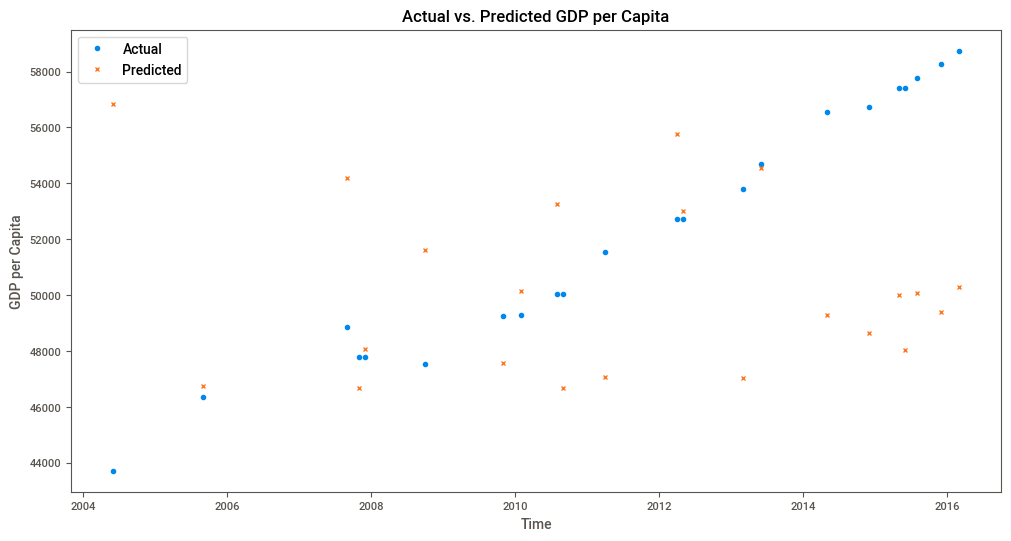

In [55]:
# base model
plt.figure(figsize=(12, 6))

# Plot actual values with markers
plt.plot(y_val_df.index, y_val_df, marker='o', linestyle='', label='Actual')

# Plot predicted values with markers
plt.plot(predictions_base_df.index, predictions_base_df, marker='x', linestyle='', label='Predicted')

plt.xlabel('Time')
plt.ylabel('GDP per Capita')
plt.title('Actual vs. Predicted GDP per Capita')
plt.legend()
plt.show()

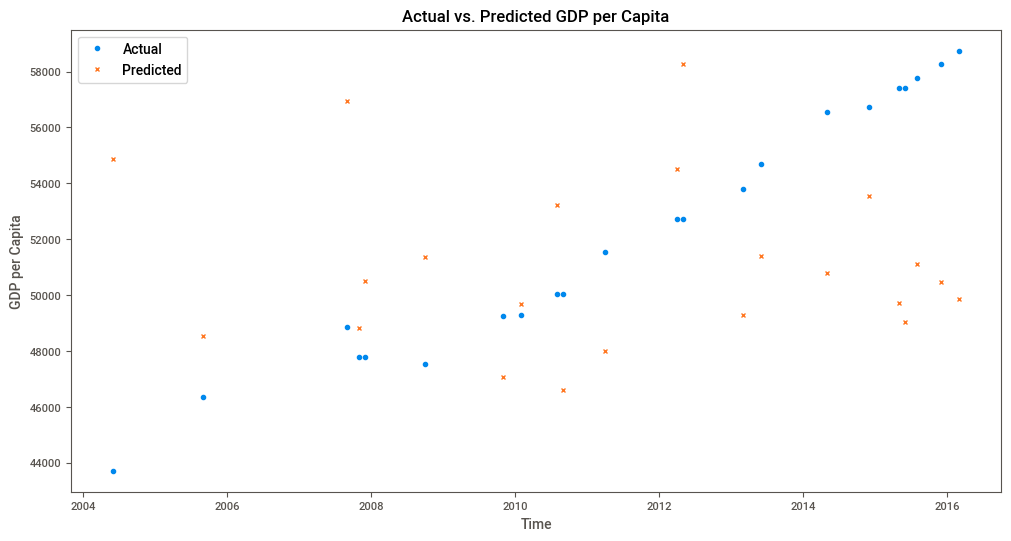

In [56]:
# hyperparameter tuning
plt.figure(figsize=(12, 6))

# Plot actual values with markers
plt.plot(y_val_df.index, y_val_df, marker='o', linestyle='', label='Actual')

# Plot predicted values with markers
plt.plot(prediction_ht_df.index, prediction_ht_df, marker='x', linestyle='', label='Predicted')

plt.xlabel('Time')
plt.ylabel('GDP per Capita')
plt.title('Actual vs. Predicted GDP per Capita')
plt.legend()
plt.show()

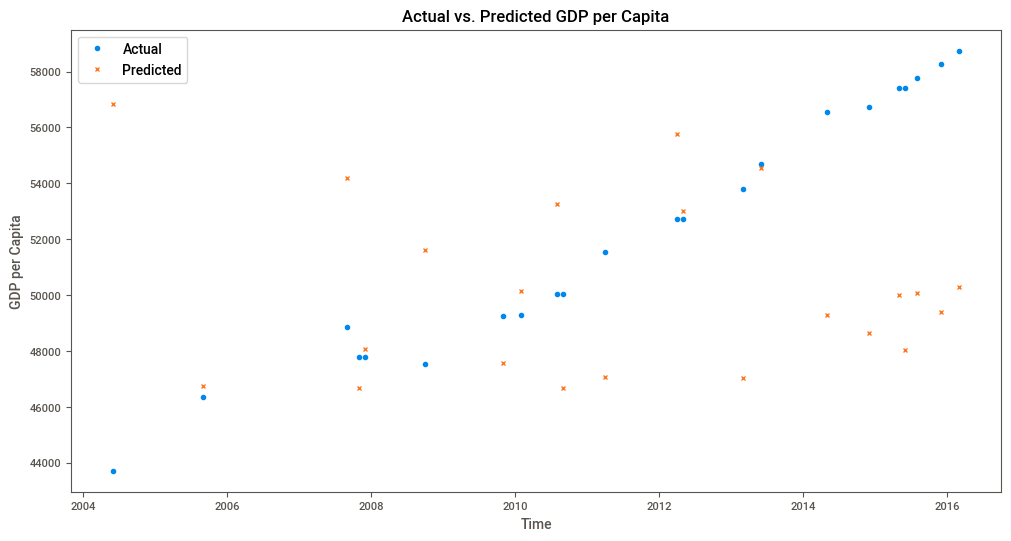

In [57]:
# bagging model
plt.figure(figsize=(12, 6))

# Plot actual values with markers
plt.plot(y_val_df.index, y_val_df, marker='o', linestyle='', label='Actual')

# Plot predicted values with markers
plt.plot(predictions_bagging_df.index, predictions_bagging_df, marker='x', linestyle='', label='Predicted')

plt.xlabel('Time')
plt.ylabel('GDP per Capita')
plt.title('Actual vs. Predicted GDP per Capita')
plt.legend()
plt.show()

### Feature Importance

In [58]:
# random forest
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

print(f'Test Loss: {np.sqrt(mean_squared_error(y_val, y_pred))}')

Test Loss: 131.40536194181274


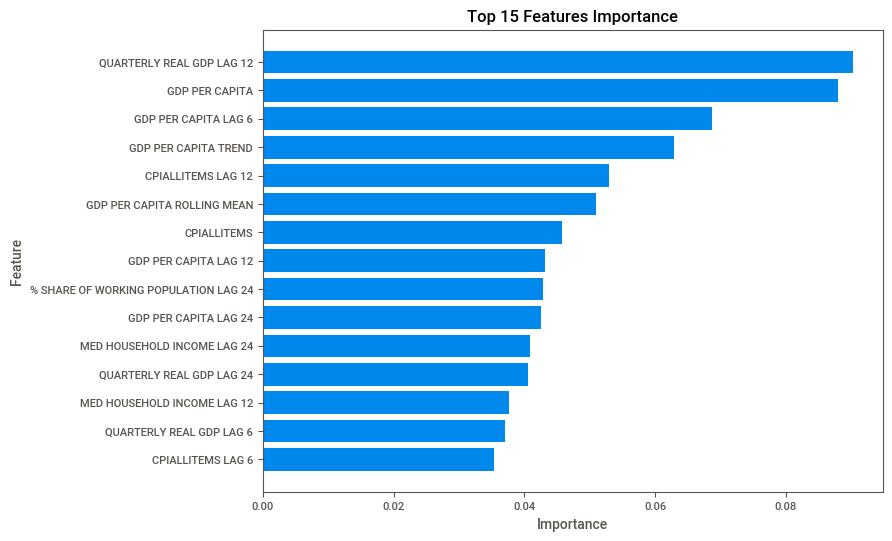

In [59]:
# select top 15 features
top_n = 15
top_indices = np.argsort(model.feature_importances_)[-top_n:]

top_features = X_train.columns[top_indices]
top_importances = model.feature_importances_[top_indices]

plt.figure(figsize=(8, 6))
plt.barh(top_features, top_importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 15 Features Importance')
plt.show()

## Conclusion

### **Summary of Findings**
- **Feature Correlation:** Certain features exhibit a high correlation with the target variable, GDP per capita.
- **Trend Observation:** There is a steady increase in GDP per capita over time.
- **Seasonal Patterns:** Each time of year displays a similar seasonal pattern, with high values toward the end of the year, decreasing throughout the year, and then returning to high values.
- **GDP Growth Consistency:** The percentage increase in GDP is consistent regardless of the level of GDP per capita.
- **Economic Indicators:** As GDP per capita increases, both the share of the working population and bond yields tend to decrease.
- **Inflation Behavior:** Inflation remains relatively stable, despite significant variations in the Consumer Price Index (CPI) and Producer Price Index (PPI).
- **Autocorrelation Insights:** The autocorrelation plot indicates persistence and some seasonal effects in the data.
- **Clustering Analysis:** The data can be segmented into four distinct clusters, each representing different macroeconomic conditions during their respective periods.
- **Model Performance:** TensorFlow models performed poorly, with high RMSE values and failing to capture the upward trend seen in actual GDP per capita. In contrast, the Random Forest model demonstrated significantly better performance.
- **Feature Importance:** Time-series features derived from GDP were the most important for predictions, followed by CPI.

### **Implications**
- **Impact:** The findings reveal key relationships between macroeconomic indicators and GDP per capita, highlighting the importance of incorporating both economic factors and seasonal patterns in forecasting models. This addresses the research question by clarifying how different features influence GDP trends.
- **Applications:** Companies can adjust strategies based on GDP forecasts, anticipating changes in demand for normal versus inferior goods.

### **Limitations**
- **Model Performance:** TensorFlow models exhibited relatively high RMSE and failed to capture the upward trend in GDP per capita. In contrast, the Random Forest model demonstrated significantly better performance. Consequently, relying on TensorFlow models could lead to less accurate predictions.

### **Future Work**
- **Model Selection:** Consider using alternative models from Scikit-Learn or other libraries to improve performance and capture trends more effectively.
- **Data Frequency:** Obtain data for features like median household income and GDP per capita at more frequent intervals to avoid duplication and enhance prediction accuracy.